# Covid-19 and Depression/Anxiety Diagnoses

## Permissions

* [X] YES - make available
* [  ] NO - keep private

# Overview

As a group we were interested in mental health as a research topic, and through our experiences through the uncertain and challenging times of the COVID-19 time period, we grew interested in looking into the possible relationships that may exist between the pandemic time period and the consequences it may have had on mental health. We looked at three specific types of mental health disorders (depression, anxiety, and a combination of depression or anxiety) across different regions of the United States as well as different age groups across the US.  We analyzed the distributions of these mental disorders across these different groups throughout the COVID-19 time period to uncover if there were any patterns between age groups or regions in America. Our results showed that the Southwest region and the youngest age group had the highest levels of these mental disorders throughout the COVID-19 time period and were different from the mean levels of these mental disorders of the other regional and age groups.

# Names

- Dancheng Liu
- Henry Pham-Tran
- Jerry Waldorf
- Katrina Ingham
- Radu Manea

<a id='research_question'></a>
# Research Question

Does there exist a relationship between the time period of COVID-19 and a change in mental health diagnosis such as depression and anxiety? Specifically, does the time period of COVID 19 have an effect on levels of depression and anxiety of different regions of the United States and different age ranges throughout the COVID-19 time period?

<a id='background'></a>

## Background & Prior Work

As might be expected, there is already ample research and data on the correlation of Covid-19 and mental health decline. The CDC in August 2020 reported that "Younger adults, racial/ethnic minorities, essential workers, and unpaid adult caregivers reported having experienced disproportionately worse mental health outcomes, increased substance use, and elevated suicidal ideation." (CDC, 2020). These studies were highly incentivized by the public in order to call attention to inequality of healthcare access and resources. Furthering this study, does region (controlling for population size) have an effect on mental health declines in depression and anxiety? 

Panchal et. al 2021 echoes this sentiment of Covid-19 having a disproportionate impact on marginalized groups. This study focuses its lens on substance abuse, while also addressing mental health as a whole. In particular, this study speaks on the age-related part of our data research, noting that "During the pandemic, a larger than average share of young adults (ages 18-24) report symptoms of anxiety and/or depressive disorder (56%)," (Panchal et. al 2021). We will be gathering, cleaning, and visualizing our own data in this project in order to clearly see whether there exists a correlation between depression/anxiety and age, or depression/anxiety and regions of the United States. 


References (include links):
1) https://www.cdc.gov/mmwr/volumes/69/wr/mm6932a1.htm

2) https://www.kff.org/coronavirus-covid-19/issue-brief/the-implications-of-covid-19-for-mental-health-and-substance-use/

# Hypothesis


Our group hypothesizes that younger age groups will tend to have higher levels of the mental disorders in question throughout the COVID-19 time period compared to older age groups.  We believe this may be the case due to more societal pressures put on younger people compared to older people including job pursuit and social life imbalances, as well as less confidence and stability in the lives of younger people.  Our group also hypothesizes that there will be no significant differences in the levels of the mental disorders in question between the different regions of the United States throughout the COVID-19 time period.  We believe this to be the case as COVID-19 drastically changed the lives of all people across the nation. 

# Dataset(s)

- Dataset Name: Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv
- Link to the dataset: https://www.cdc.gov/nchs/covid19/pulse/mental-health.htm
- Number of observations: 6057

Description of Dataset: This dataset contains levels of anxiety, depression, and anxiety plus depression, broken down by 1-2 week time periods throughout the COVID-19 time period from April 23, 2020 to April 26, 2021.  The dataset also breaks down the levels of these mental disorders by state wide levels of depresion and anxiety for all the US states and different age ranges throughout this time period.

- Dataset Name: DPQ_J 
- Link to the dataset: https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DPQ_J.htm
- Number of observations: 5533

This is a dataset that records screening results from a survey in 2018 about people's depression symptoms. It contains results from 5533 participants and their resoponses to 10 criterias that are used to determine depression. We will use the two datasets together to show the effect of COVID-19 to people's depression and axiety level. We will use the DPQ_J dataset to show the percent of peopple that are depressed prior to COvID-19, and use it as a comparison to the percent of people that are depressed during the pandemic. 

# Setup

In [1]:
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# Statmodels & patsy
import patsy
import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind

import warnings
warnings.filterwarnings('ignore')

#improve resolution
%config InlineBackend.figure_format ='retina'

from IPython.display import Image

# Data Cleaning


- Our data was fairly clean as it did not contain many missing values, or values that were unreasonable.  It also did not contain any personal information that would be needed to be taken out to protect indiviudual's information.

- To get our data into usable format we first removed unnecessary and redundant columns from this dataset in order to only work with the necessary data we needed to answer our research question. 

- We also further divided the dataset into datasets that split the data into the groups we wanted to address to answer our research question.  We divided the dataset into data on the separate mental disorders we are reasearching, as well each of these datasets into the groupings of by age and by state.

- After dividing the datasets into groupings of by age and by state, we further grouped the data divided by state into more general regions of the United States.

- We also will add a column for the corresponding time period numerically that each row corresponds to

- We checked to see if there were any missing values for the values for the levels of the mental disorders contained in this dataset,  as well as we looked for any outrageous or unreasonable values contained in our dataset by looking at the distributions of our data. We found few missing values in our dataset which we removed, and we concluded there were no unreasonable values in our dataset.  

## Dataset No. 1

#### This is the original raw data set

In [2]:
table = pd.read_csv(
    'data/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv')
table.head()

Indicator              Group          State  \
0  Symptoms of Depressive Disorder  National Estimate  United States   
1  Symptoms of Depressive Disorder             By Age  United States   
2  Symptoms of Depressive Disorder             By Age  United States   
3  Symptoms of Depressive Disorder             By Age  United States   
4  Symptoms of Depressive Disorder             By Age  United States   

        Subgroup Phase  Time Period Time Period Label  Time Period Start Date  \
0  United States     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
1  18 - 29 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
2  30 - 39 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
3  40 - 49 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   
4  50 - 59 years     1            1    Apr 23 - May 5  04/23/2020 12:00:00 AM   

     Time Period End Date  Value  Low CI  High CI Confidence Interval  \
0  05/05/2020 12:00:00 AM   23.5    22.7     24.3         22.7 - 24.3   
1  05/05/2020 12:00:00 AM   32.7    30.2     35.2         30.2 - 35.2   
2  05/05/2020 12:00:00 AM   25.7    24.1     27.3         24.1 - 27.3   
3  05/05/2020 12:00:00 AM   24.8    23.3     26.2         23.3 - 26.2   
4  05/05/2020 12:00:00 AM   23.2    21.5     25.0         21.5 - 25.0   

  Quartile Range  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN

#### Here we will remove the columns that are redundant or not needed to do our analysis to answer the question does the time period of COVID 19 have an effect on levels of depression and anxiety of different regions of the United States and different age groups throughout the COVID-19 time period?

In [3]:
table = table.drop(columns = ["Phase", "Time Period Start Date",
                              "Time Period End Date", "Confidence Interval", "Quartile Range"])
table

Indicator              Group  \
0                       Symptoms of Depressive Disorder  National Estimate   
1                       Symptoms of Depressive Disorder             By Age   
2                       Symptoms of Depressive Disorder             By Age   
3                       Symptoms of Depressive Disorder             By Age   
4                       Symptoms of Depressive Disorder             By Age   
...                                                 ...                ...   
6052  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
6053  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
6054  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
6055  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
6056  Symptoms of Anxiety Disorder or Depressive Dis...           By State   

              State       Subgroup  Time Period Time Period Label  Value  \
0     United States  United States            1    Apr 23 - May 5   23.5   
1     United States  18 - 29 years            1    Apr 23 - May 5   32.7   
2     United States  30 - 39 years            1    Apr 23 - May 5   25.7   
3     United States  40 - 49 years            1    Apr 23 - May 5   24.8   
4     United States  50 - 59 years            1    Apr 23 - May 5   23.2   
...             ...            ...          ...               ...    ...   
6052       Virginia       Virginia           28   Apr 14 - Apr 26   25.8   
6053     Washington     Washington           28   Apr 14 - Apr 26   29.7   
6054  West Virginia  West Virginia           28   Apr 14 - Apr 26   42.1   
6055      Wisconsin      Wisconsin           28   Apr 14 - Apr 26   26.0   
6056        Wyoming        Wyoming           28   Apr 14 - Apr 26   22.0   

      Low CI  High CI  
0       22.7     24.3  
1       30.2     35.2  
2       24.1     27.3  
3       23.3     26.2  
4       21.5     25.0  
...      ...      ...  
6052    21.3     30.7  
6053    26.5     33.1  
6054    35.5     48.9  
6055    23.1     29.2  
6056    17.2     27.4  

[6057 rows x 9 columns]

#### Here we will see if there are any missing values in our dataset, and we notice there are only missing values for the Value, Low CI, and High CI columns

In [4]:
table.isna().sum()

Indicator              0
Group                  0
State                  0
Subgroup               0
Time Period            0
Time Period Label      0
Value                171
Low CI               171
High CI              171
dtype: int64

#### Here we will drop the missing values in our for the Value, Low CI, and High CI columns

In [5]:
table = table.dropna( how='any', subset=['Value', 'Low CI', 'High CI'])
table

Indicator              Group  \
0                       Symptoms of Depressive Disorder  National Estimate   
1                       Symptoms of Depressive Disorder             By Age   
2                       Symptoms of Depressive Disorder             By Age   
3                       Symptoms of Depressive Disorder             By Age   
4                       Symptoms of Depressive Disorder             By Age   
...                                                 ...                ...   
6052  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
6053  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
6054  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
6055  Symptoms of Anxiety Disorder or Depressive Dis...           By State   
6056  Symptoms of Anxiety Disorder or Depressive Dis...           By State   

              State       Subgroup  Time Period Time Period Label  Value  \
0     United States  United States            1    Apr 23 - May 5   23.5   
1     United States  18 - 29 years            1    Apr 23 - May 5   32.7   
2     United States  30 - 39 years            1    Apr 23 - May 5   25.7   
3     United States  40 - 49 years            1    Apr 23 - May 5   24.8   
4     United States  50 - 59 years            1    Apr 23 - May 5   23.2   
...             ...            ...          ...               ...    ...   
6052       Virginia       Virginia           28   Apr 14 - Apr 26   25.8   
6053     Washington     Washington           28   Apr 14 - Apr 26   29.7   
6054  West Virginia  West Virginia           28   Apr 14 - Apr 26   42.1   
6055      Wisconsin      Wisconsin           28   Apr 14 - Apr 26   26.0   
6056        Wyoming        Wyoming           28   Apr 14 - Apr 26   22.0   

      Low CI  High CI  
0       22.7     24.3  
1       30.2     35.2  
2       24.1     27.3  
3       23.3     26.2  
4       21.5     25.0  
...      ...      ...  
6052    21.3     30.7  
6053    26.5     33.1  
6054    35.5     48.9  
6055    23.1     29.2  
6056    17.2     27.4  

[5886 rows x 9 columns]

#### Here we will look at the different values of the Indicator column to divide our data into the individual datasets we need to answer our research question

In [6]:
table["Indicator"].value_counts()

Symptoms of Anxiety Disorder or Depressive Disorder    1962
Symptoms of Depressive Disorder                        1962
Symptoms of Anxiety Disorder                           1962
Name: Indicator, dtype: int64

#### Here we will look at the different values of the Group column to further divide our data into the individual datasets we need to answer our research question

In [7]:
table["Group"].value_counts()

By State                      4284
By Age                         588
By Race/Hispanic ethnicity     420
By Education                   336
By Sex                         168
National Estimate               84
By Disability status             6
Name: Group, dtype: int64

#### Here we will look at the different values of the State column to group our data into the corresponding United States regions in which they belong

In [8]:
table["State"].value_counts()

United States           1602
Missouri                  84
District of Columbia      84
Georgia                   84
South Carolina            84
Nevada                    84
Iowa                      84
Delaware                  84
Connecticut               84
Kentucky                  84
Maryland                  84
North Carolina            84
Colorado                  84
South Dakota              84
Montana                   84
New Hampshire             84
Idaho                     84
North Dakota              84
Kansas                    84
Nebraska                  84
Louisiana                 84
Massachusetts             84
Oklahoma                  84
Wisconsin                 84
West Virginia             84
Ohio                      84
California                84
New Mexico                84
Indiana                   84
Washington                84
Alabama                   84
Rhode Island              84
Illinois                  84
Hawaii                    84
Arizona       

#### Here we will create a filter function that converts the state in a specific row to the corresponding region of the United States this state belongs.  Regions we will include are West, Midwest, Northeast, Southeast, and Southwest.

#### Here is a map to visualize how we will be breaking down the United States into regions:

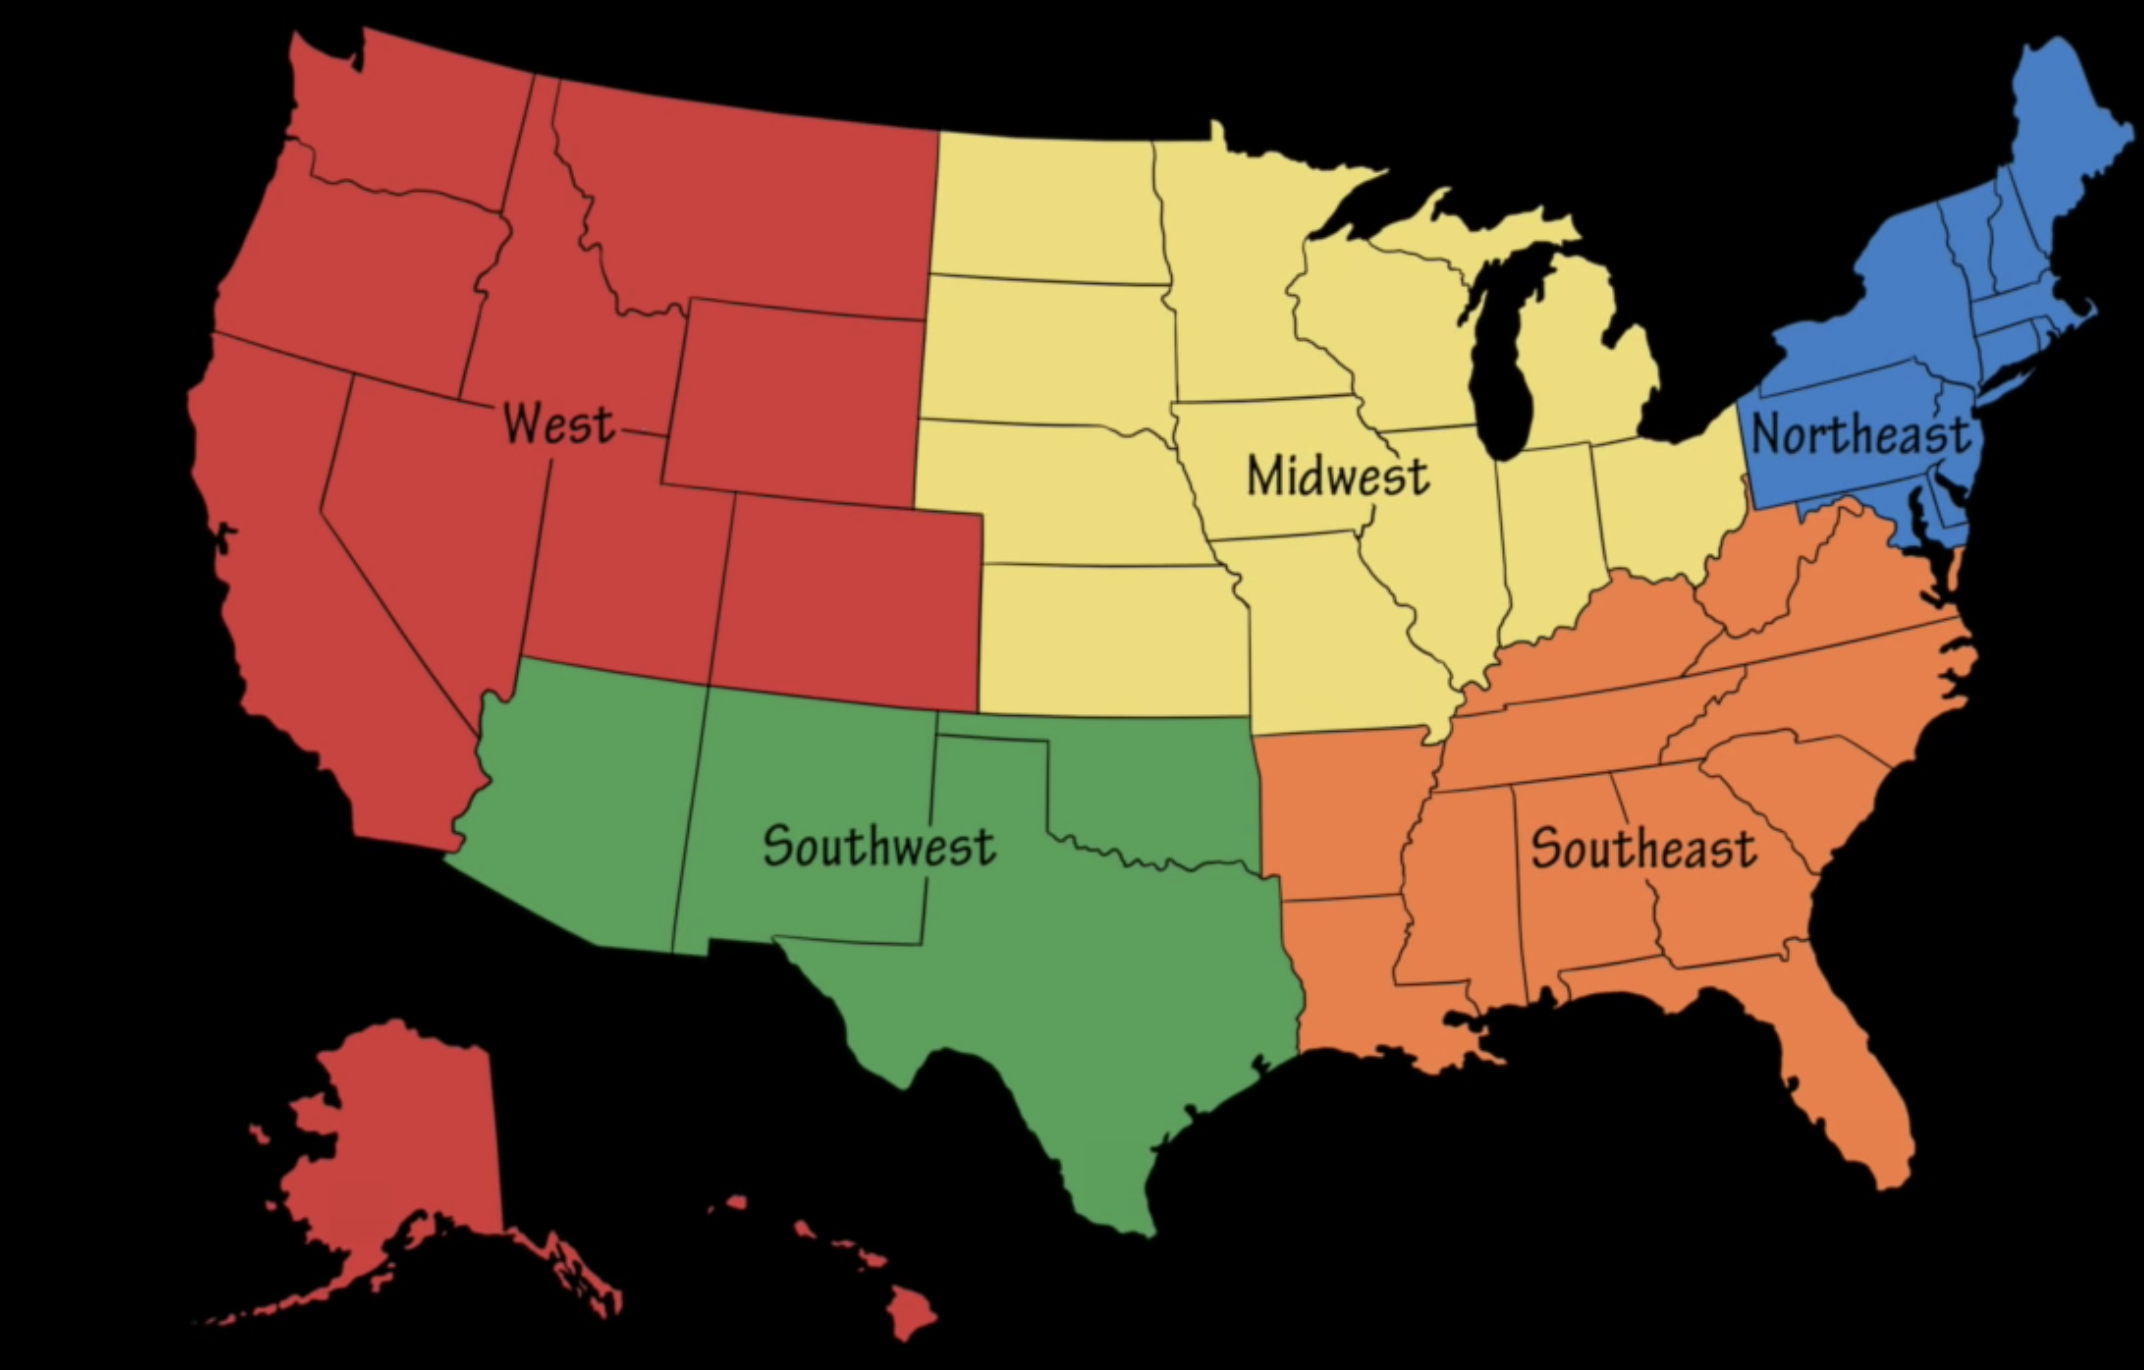

In [9]:
Image("data/Regions_Map.png")

In [10]:
'''
This is a helper function to convert state to its specific region.
'''
def state_to_region(state):
    
    west = ['Washington', 'Oregon', 'California', 'Hawaii', 'Alaska', 'Nevada', 'Idaho',
            'Montana', 'Utah', 'Colorado', 'Wyoming']
    
    midwest = ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Missouri', 'Iowa', 
              'Minnesota', 'Wisconsin', 'Illinois', 'Michigan', 'Indiana', 'Ohio']
    
    northeast = ['Maryland', 'Delaware', 'New Jersey', 'Pensylvania', 'New York', 'Connecticut', 
                 'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire', 'Maine']
    
    southeast = ['District of Columbia', 'Virginia', 'West Virginia', 'Kentucky', 'North Carolina', 'South Carolina',
                 'Tennessee', 'Arkansas', 'Louisiana', 'Mississippi', 'Alabama', 'Georgia', 'Florida']
    
    southwest = ['Arizona', 'New Mexico', 'Texas', 'Oklahoma']
        
    # West Region
    if( state in west ):
        output = 'West'
        
    # Midwest Region    
    elif( state in midwest ):
        output = 'Midwest'
        
    # Northeast Region
    elif( state in northeast ):
        output = 'Northeast'
        
    # Southeast Region    
    elif( state in southeast ):
        output = 'Southeast'
        
    # Southwest Region    
    elif( state in southwest ):
        output = 'Southwest'
          
    else:
        output = np.nan
    
    return output

#### Here we will get the data on specifically depression levels in our dataset

In [11]:
table_depression = table[ table["Indicator"] == "Symptoms of Depressive Disorder"]
table_depression.head()

Indicator              Group          State  \
0  Symptoms of Depressive Disorder  National Estimate  United States   
1  Symptoms of Depressive Disorder             By Age  United States   
2  Symptoms of Depressive Disorder             By Age  United States   
3  Symptoms of Depressive Disorder             By Age  United States   
4  Symptoms of Depressive Disorder             By Age  United States   

        Subgroup  Time Period Time Period Label  Value  Low CI  High CI  
0  United States            1    Apr 23 - May 5   23.5    22.7     24.3  
1  18 - 29 years            1    Apr 23 - May 5   32.7    30.2     35.2  
2  30 - 39 years            1    Apr 23 - May 5   25.7    24.1     27.3  
3  40 - 49 years            1    Apr 23 - May 5   24.8    23.3     26.2  
4  50 - 59 years            1    Apr 23 - May 5   23.2    21.5     25.0

#### Here we will get the data on specifically depression levels broken down by age in our dataset

In [12]:
table_depression_by_age = table_depression[ table_depression["Group"] == "By Age" ]

#### Here we will get the data on specifically depression levels broken down by state in our dataset and convert these states using our state_to_region() function into their corresponding region in the United States

In [13]:
table_depression_by_region = table_depression[ table_depression["Group"] == "By State" ]

table_depression_by_region['State'] = table_depression_by_region['State'].apply(state_to_region)

table_depression_by_region.head()

Indicator     Group      State    Subgroup  \
19  Symptoms of Depressive Disorder  By State  Southeast     Alabama   
20  Symptoms of Depressive Disorder  By State       West      Alaska   
21  Symptoms of Depressive Disorder  By State  Southwest     Arizona   
22  Symptoms of Depressive Disorder  By State  Southeast    Arkansas   
23  Symptoms of Depressive Disorder  By State       West  California   

    Time Period Time Period Label  Value  Low CI  High CI  
19            1    Apr 23 - May 5   18.6    14.6     23.1  
20            1    Apr 23 - May 5   19.2    16.8     21.8  
21            1    Apr 23 - May 5   22.4    19.4     25.5  
22            1    Apr 23 - May 5   26.6    22.3     31.3  
23            1    Apr 23 - May 5   25.4    22.5     28.6

#### Here we will get the data on specifically anxiety levels in our dataset

In [14]:
table_anxiety = table[ table["Indicator"] == "Symptoms of Anxiety Disorder"]
table_anxiety.head()

Indicator              Group          State  \
70  Symptoms of Anxiety Disorder  National Estimate  United States   
71  Symptoms of Anxiety Disorder             By Age  United States   
72  Symptoms of Anxiety Disorder             By Age  United States   
73  Symptoms of Anxiety Disorder             By Age  United States   
74  Symptoms of Anxiety Disorder             By Age  United States   

         Subgroup  Time Period Time Period Label  Value  Low CI  High CI  
70  United States            1    Apr 23 - May 5   30.8    30.0     31.7  
71  18 - 29 years            1    Apr 23 - May 5   40.2    38.1     42.4  
72  30 - 39 years            1    Apr 23 - May 5   34.4    32.6     36.1  
73  40 - 49 years            1    Apr 23 - May 5   34.1    32.1     36.2  
74  50 - 59 years            1    Apr 23 - May 5   31.0    29.0     33.1

#### Here we will get the data on specifically anxiety levels broken down by age in our dataset

In [15]:
table_anxiety_by_age = table_anxiety[ table_anxiety["Group"] == "By Age" ]

#### Here we will get the data on specifically anxiety levels broken down by state in our dataset and convert these states using our state_to_region() function into their corresponding region in the United States

In [16]:
table_anxiety_by_region = table_anxiety[ table_anxiety["Group"] == "By State" ]

table_anxiety_by_region['State'] = table_anxiety_by_region['State'].apply(state_to_region)

table_anxiety_by_region.head()

Indicator     Group      State    Subgroup  \
89  Symptoms of Anxiety Disorder  By State  Southeast     Alabama   
90  Symptoms of Anxiety Disorder  By State       West      Alaska   
91  Symptoms of Anxiety Disorder  By State  Southwest     Arizona   
92  Symptoms of Anxiety Disorder  By State  Southeast    Arkansas   
93  Symptoms of Anxiety Disorder  By State       West  California   

    Time Period Time Period Label  Value  Low CI  High CI  
89            1    Apr 23 - May 5   25.6    20.7     30.9  
90            1    Apr 23 - May 5   27.7    24.8     30.7  
91            1    Apr 23 - May 5   32.3    28.0     36.8  
92            1    Apr 23 - May 5   33.7    28.2     39.6  
93            1    Apr 23 - May 5   30.8    28.2     33.5

#### Here we will get the data on specifically anxiety or depression levels in our dataset

In [17]:
table_anxiety_or_depression = table[ table["Indicator"] == "Symptoms of Anxiety Disorder or Depressive Disorder"]
table_anxiety_or_depression.head()

Indicator              Group  \
140  Symptoms of Anxiety Disorder or Depressive Dis...  National Estimate   
141  Symptoms of Anxiety Disorder or Depressive Dis...             By Age   
142  Symptoms of Anxiety Disorder or Depressive Dis...             By Age   
143  Symptoms of Anxiety Disorder or Depressive Dis...             By Age   
144  Symptoms of Anxiety Disorder or Depressive Dis...             By Age   

             State       Subgroup  Time Period Time Period Label  Value  \
140  United States  United States            1    Apr 23 - May 5   35.9   
141  United States  18 - 29 years            1    Apr 23 - May 5   46.8   
142  United States  30 - 39 years            1    Apr 23 - May 5   39.6   
143  United States  40 - 49 years            1    Apr 23 - May 5   38.9   
144  United States  50 - 59 years            1    Apr 23 - May 5   35.8   

     Low CI  High CI  
140    35.0     36.8  
141    44.3     49.3  
142    37.7     41.5  
143    37.2     40.7  
144    34.0     37.7

#### Here we will get the data on specifically anxiety or depression levels broken down by age in our dataset

In [18]:
table_anxiety_or_depression_by_age = table_anxiety_or_depression[ table_anxiety_or_depression["Group"] == "By Age" ]

#### Here we will get the data on specifically anxiety or depression levels broken down by state in our dataset and convert these states using our state_to_region() function into their corresponding region in the United States

In [19]:
table_anxiety_or_depression_by_region = table_anxiety_or_depression[ table_anxiety_or_depression["Group"] == "By State" ]

table_anxiety_or_depression_by_region['State'] = table_anxiety_or_depression_by_region['State'].apply(state_to_region)

table_anxiety_or_depression_by_region.head()

Indicator     Group      State  \
159  Symptoms of Anxiety Disorder or Depressive Dis...  By State  Southeast   
160  Symptoms of Anxiety Disorder or Depressive Dis...  By State       West   
161  Symptoms of Anxiety Disorder or Depressive Dis...  By State  Southwest   
162  Symptoms of Anxiety Disorder or Depressive Dis...  By State  Southeast   
163  Symptoms of Anxiety Disorder or Depressive Dis...  By State       West   

       Subgroup  Time Period Time Period Label  Value  Low CI  High CI  
159     Alabama            1    Apr 23 - May 5   30.3    24.8     36.2  
160      Alaska            1    Apr 23 - May 5   31.5    28.8     34.4  
161     Arizona            1    Apr 23 - May 5   36.4    32.3     40.7  
162    Arkansas            1    Apr 23 - May 5   38.0    33.1     43.1  
163  California            1    Apr 23 - May 5   37.4    34.2     40.6

## Dataset No.2

#### This is the raw data for DPQ_J

In [20]:
prior_covid = pd.read_sas('data/DPQ_J.XPT')
prior_covid.head()

SEQN        DPQ010        DPQ020        DPQ030        DPQ040  \
0  93705.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
1  93706.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
2  93708.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
3  93709.0           NaN           NaN           NaN           NaN   
4  93711.0  1.000000e+00  5.397605e-79  1.000000e+00  5.397605e-79   

         DPQ050        DPQ060        DPQ070        DPQ080        DPQ090  \
0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
1  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
2  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
3           NaN           NaN           NaN           NaN           NaN   
4  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   

         DPQ100  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4  5.397605e-79

#### Here we drop the last column about survey satisfication response

In [21]:
prior_covid_after_drop_dpq100 = prior_covid.drop(columns=['DPQ100'])
prior_covid_after_drop_dpq100.head()

SEQN        DPQ010        DPQ020        DPQ030        DPQ040  \
0  93705.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
1  93706.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
2  93708.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
3  93709.0           NaN           NaN           NaN           NaN   
4  93711.0  1.000000e+00  5.397605e-79  1.000000e+00  5.397605e-79   

         DPQ050        DPQ060        DPQ070        DPQ080        DPQ090  
0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  
1  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  
2  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  
3           NaN           NaN           NaN           NaN           NaN  
4  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79

#### Here we drop all NA values

In [22]:
prior_covid_after_drop_na = prior_covid_after_drop_dpq100.dropna()
prior_covid_after_drop_na.head()

SEQN        DPQ010        DPQ020        DPQ030        DPQ040  \
0  93705.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
1  93706.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
2  93708.0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79   
4  93711.0  1.000000e+00  5.397605e-79  1.000000e+00  5.397605e-79   
5  93712.0  5.397605e-79  5.397605e-79  1.000000e+00  5.397605e-79   

         DPQ050        DPQ060        DPQ070        DPQ080        DPQ090  
0  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  
1  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  
2  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  
4  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  
5  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79  5.397605e-79

#### Here we drop all invalid inputs (anything other than 0,1,2,3 is considered as an invalid input)

In [23]:
#change all input data to int
prior_covid_after_drop_na = prior_covid_after_drop_na.astype('int32')
prior_covid_after_drop_na.head()

SEQN  DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  \
0  93705       0       0       0       0       0       0       0       0   
1  93706       0       0       0       0       0       0       0       0   
2  93708       0       0       0       0       0       0       0       0   
4  93711       1       0       1       0       0       0       0       0   
5  93712       0       0       1       0       0       0       0       0   

   DPQ090  
0       0  
1       0  
2       0  
4       0  
5       0

In [24]:
# clean all invalid inputs
prior_covid_after_drop_na = prior_covid_after_drop_na[prior_covid_after_drop_na['DPQ010'].isin([0,1,2,3])]
prior_covid_after_drop_na = prior_covid_after_drop_na[prior_covid_after_drop_na['DPQ020'].isin([0,1,2,3])]
prior_covid_after_drop_na = prior_covid_after_drop_na[prior_covid_after_drop_na['DPQ030'].isin([0,1,2,3])]
prior_covid_after_drop_na = prior_covid_after_drop_na[prior_covid_after_drop_na['DPQ040'].isin([0,1,2,3])]
prior_covid_after_drop_na = prior_covid_after_drop_na[prior_covid_after_drop_na['DPQ050'].isin([0,1,2,3])]
prior_covid_after_drop_na = prior_covid_after_drop_na[prior_covid_after_drop_na['DPQ060'].isin([0,1,2,3])]
prior_covid_after_drop_na = prior_covid_after_drop_na[prior_covid_after_drop_na['DPQ070'].isin([0,1,2,3])]
prior_covid_after_drop_na = prior_covid_after_drop_na[prior_covid_after_drop_na['DPQ080'].isin([0,1,2,3])]
prior_covid_after_drop_na = prior_covid_after_drop_na[prior_covid_after_drop_na['DPQ090'].isin([0,1,2,3])]
prior_covid_after_drop_all_invalid = prior_covid_after_drop_na
prior_covid_after_drop_all_invalid.head()

SEQN  DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  \
0  93705       0       0       0       0       0       0       0       0   
1  93706       0       0       0       0       0       0       0       0   
2  93708       0       0       0       0       0       0       0       0   
4  93711       1       0       1       0       0       0       0       0   
5  93712       0       0       1       0       0       0       0       0   

   DPQ090  
0       0  
1       0  
2       0  
4       0  
5       0

#### Here we create a sum column so we can determine whether the respondent is depressed

In [25]:
# add all scores together
prior_covid_finished = prior_covid_after_drop_all_invalid
prior_covid_finished['SUM'] = prior_covid_after_drop_all_invalid.sum(axis=1)
#excluding SEQN
prior_covid_finished['SUM'] = prior_covid_finished['SUM']-prior_covid_finished['SEQN']

#take a look at the dataset
prior_covid_finished.head()

SEQN  DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  \
0  93705       0       0       0       0       0       0       0       0   
1  93706       0       0       0       0       0       0       0       0   
2  93708       0       0       0       0       0       0       0       0   
4  93711       1       0       1       0       0       0       0       0   
5  93712       0       0       1       0       0       0       0       0   

   DPQ090  SUM  
0       0    0  
1       0    0  
2       0    0  
4       0    2  
5       0    1

#### Here we create a depressed column so we can determine whether the respondent is depressed

In [26]:
prior_covid_finished['DEPRESSED'] = prior_covid_finished['SUM']>=10

#take a look at the dataset
prior_covid_finished.head()

SEQN  DPQ010  DPQ020  DPQ030  DPQ040  DPQ050  DPQ060  DPQ070  DPQ080  \
0  93705       0       0       0       0       0       0       0       0   
1  93706       0       0       0       0       0       0       0       0   
2  93708       0       0       0       0       0       0       0       0   
4  93711       1       0       1       0       0       0       0       0   
5  93712       0       0       1       0       0       0       0       0   

   DPQ090  SUM  DEPRESSED  
0       0    0      False  
1       0    0      False  
2       0    0      False  
4       0    2      False  
5       0    1      False

# Exploratory Data Analysis

## Part I: COVID-19's impact to US people's overall mental health

### In this section, we will look at the COVID-19 pandemic's impact to mental health of people in the United States. We will follow our hypothesis that COVID-19 has an effect on US people's mental health by looking at the percentage of people being depressed or anxious before COVID, and compare it with the percentage during COVID.



#### We will look at a survey conducted in 2018 on people's depression level. This survey uses PHQ-9 to measure the severity of depression of the respondents. According to the paper "The PHQ-9: validity of a brief depression severity measure" (https://pubmed.ncbi.nlm.nih.gov/11556941/), a score greater or equal to 10 indicates major depression with a 88% sensitivity and specificity.

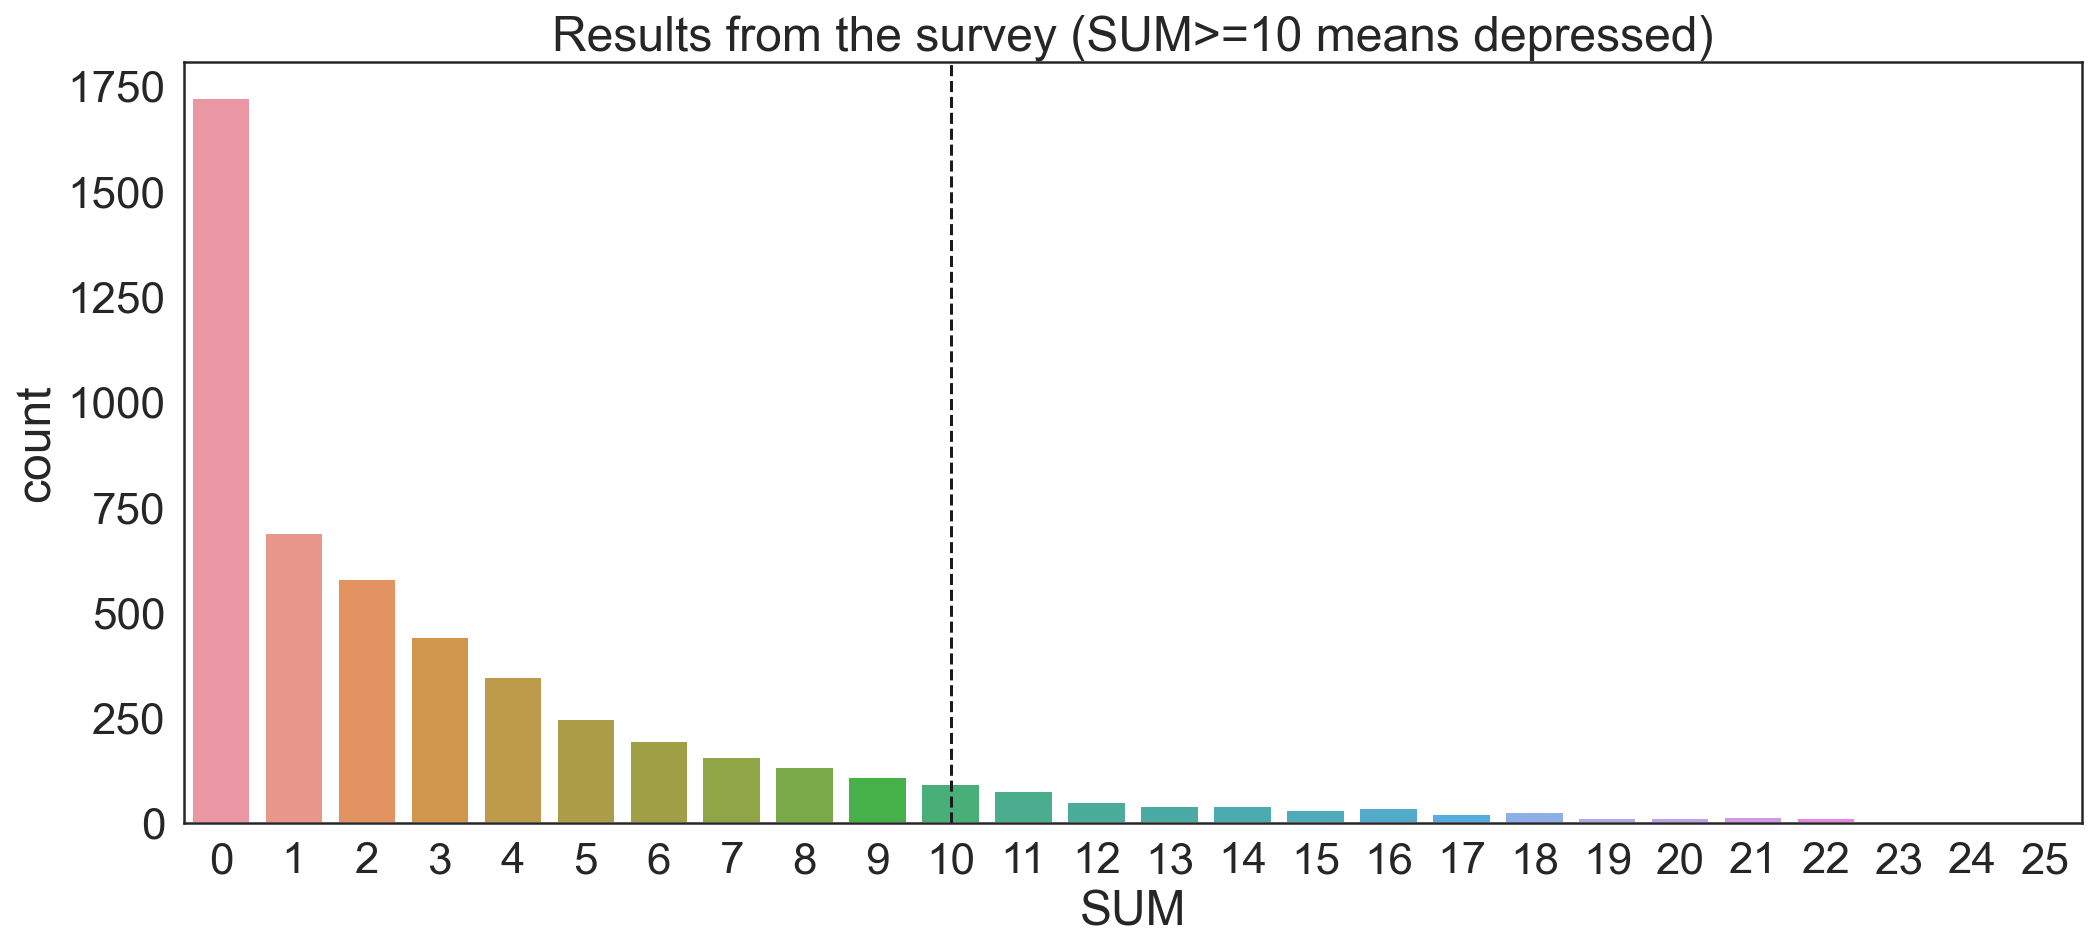

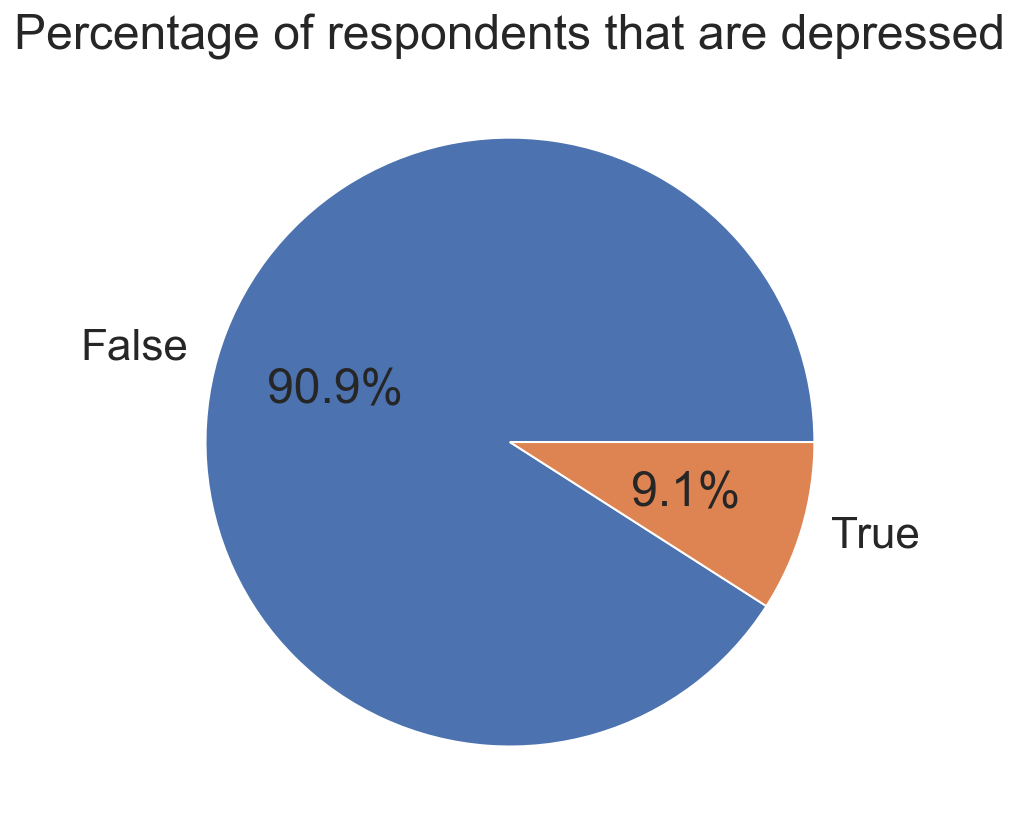

In [27]:
# plot the results
sns.countplot(data=prior_covid_finished,x='SUM')
plt.title("Results from the survey (SUM>=10 means depressed)")
plt.axvline(x=10,color='k', linestyle='--')
plt.show()


# use a pie chart to shoe percentage
data = prior_covid_finished.groupby('DEPRESSED')
data.count()['SEQN'].plot.pie(autopct="%.1f%%")
plt.ylabel('')
plt.title('Percentage of respondents that are depressed')
plt.show()

After cleaning the dataset, we dropped all the n/a values and unacceptable results. Thus, we do not expect any of the values in the finished dataset to be outlier.
The data is skewed strongly to the right. It also fits into a poisson distribution with a small $\lambda$. This is expected because most greater sum indicates stronger level of depression.

We can see that around 9.1% people have reported depression in the survey in 2018.

#### Then, we will look at the overall depression level during the COVID-19 time period. 

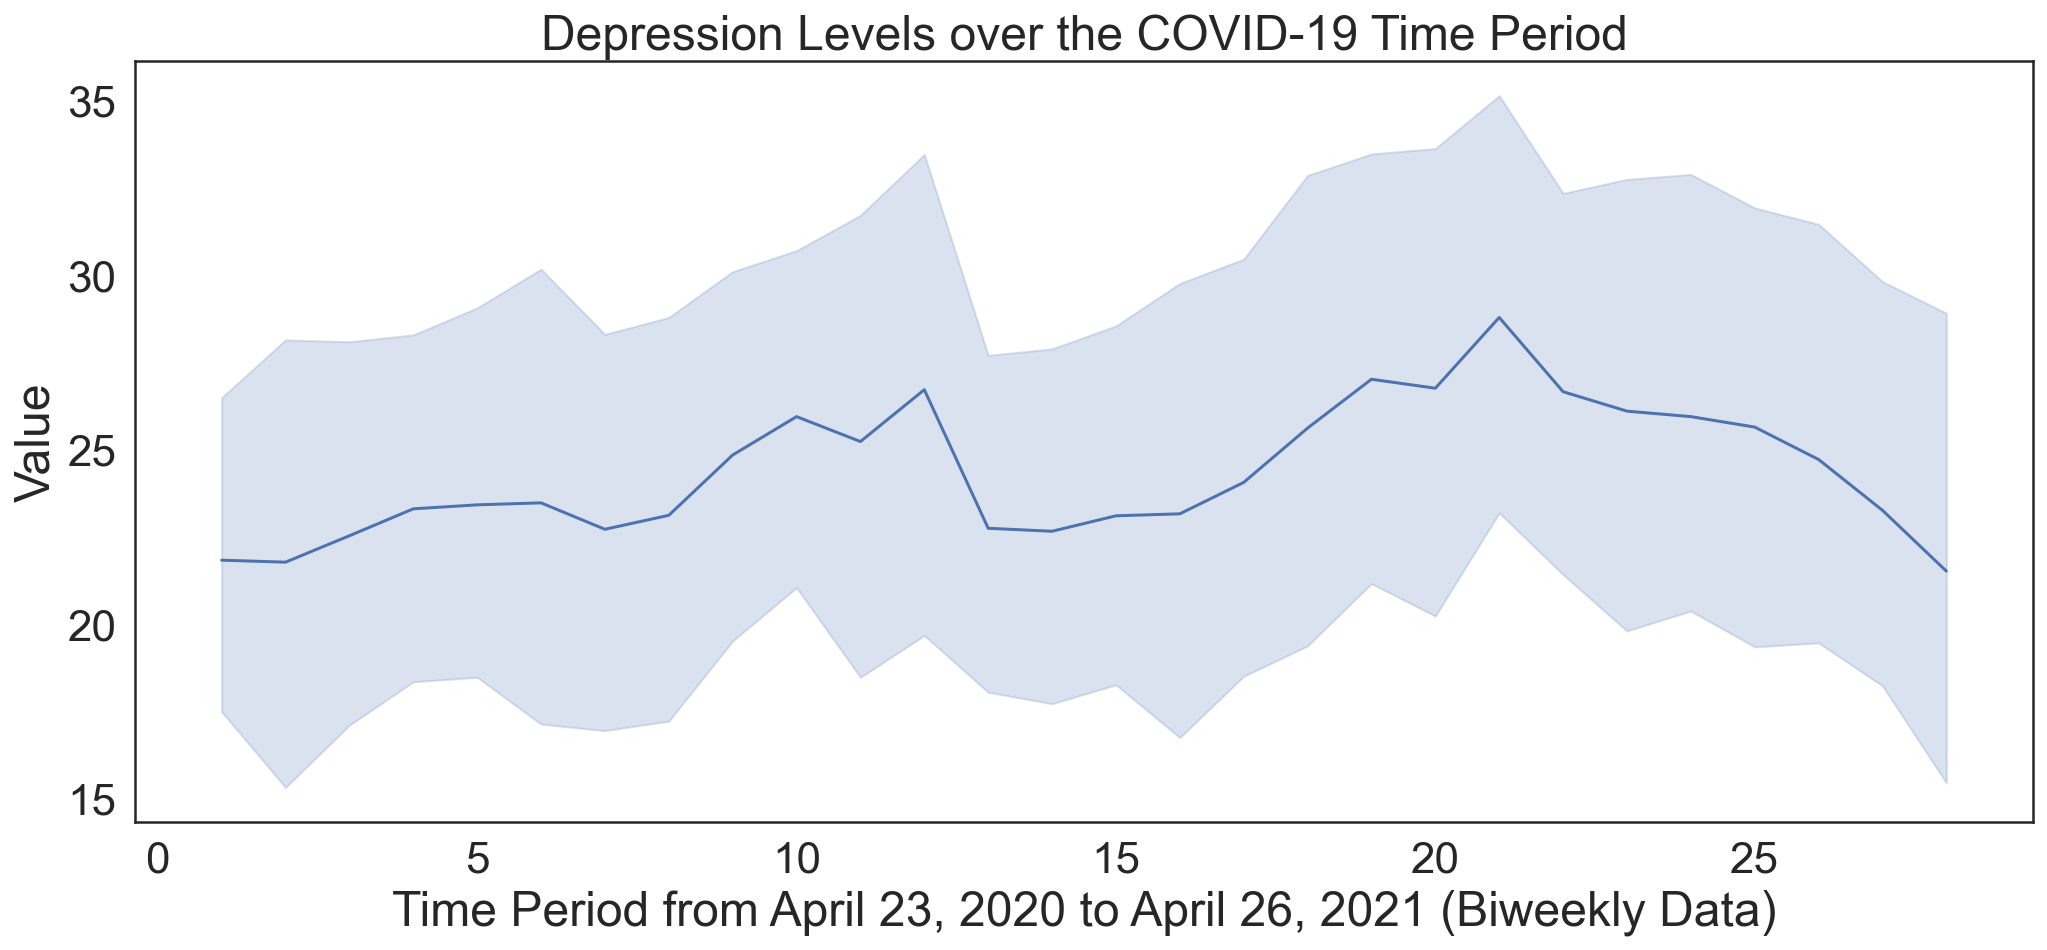

In [28]:
dep_age_plt = sns.lineplot(data=table_depression_by_age, x='Time Period', y='Value')

dep_age_plt.set(xlabel="Time Period from April 23, 2020 to April 26, 2021 (Biweekly Data)")

dep_age_plt.set_title('Depression Levels over the COVID-19 Time Period');

plt.show()

We can see from the above graph that around 20+% people are depressed in US from April 23, 2020 to April 26,2021. Although we lack sufficient criteria to perform a t-test (number of respondents in dataset 2 is not reported) across the two datasets, it is safe to assume that during the COVID-19 pandemic, more people are depressed. This is because the lower bound of confidence interval, denoted by the light blue region, is much higer than 9.1%.

## Part II: COVID-19's effect to different groups of people in US

### Here we will look at the distributions of the values of anxiety, depression, and both of these mental disorders across the regions of the United States, and by age groups.

#### Here we will take a look at the distributions of each of the depression dataset broken down by age and region to look for any unreasonable values.  There does not seem to be any unreasonable values in these datasets.  The distributions of depression levels by region seem to be normally distributed.  The distribution levels by age seem to be fairly normally distrubuted, but we may need to convert this data into ordinal data so we can carry out analysis on this distribution.  

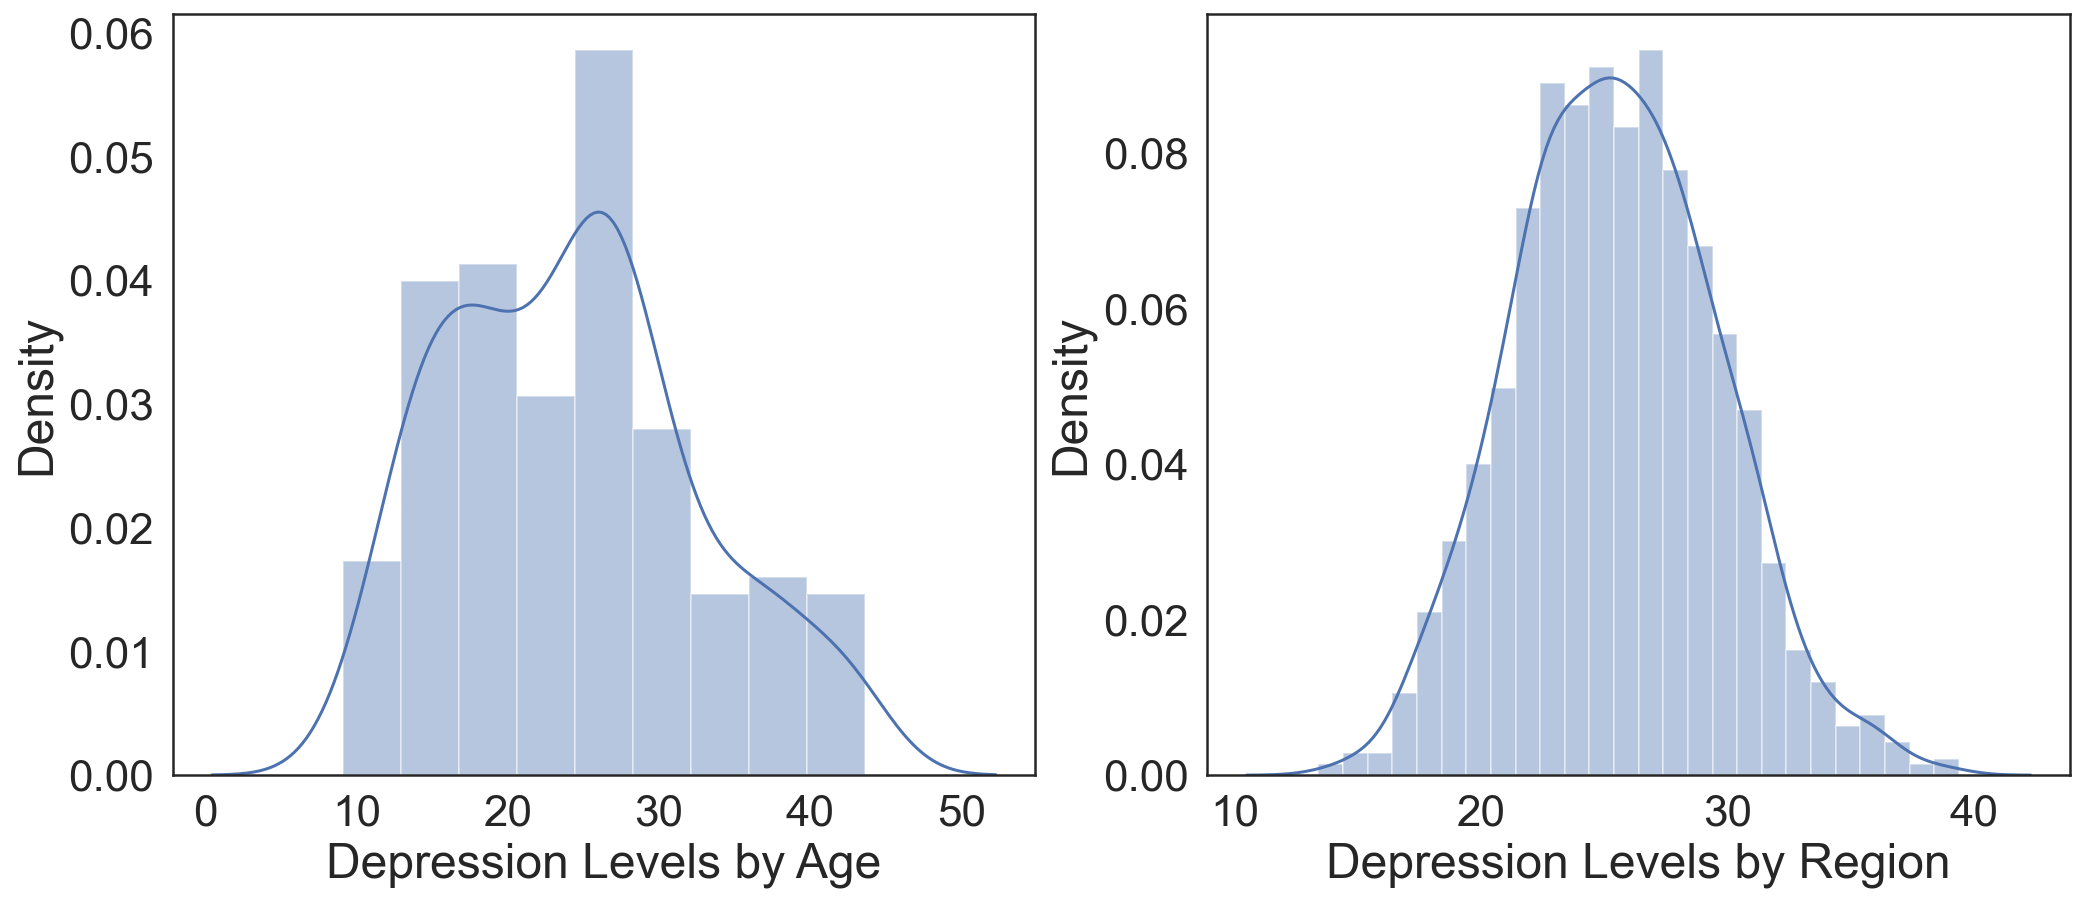

In [29]:
plt.subplot(1, 2, 1)
sns.distplot(table_depression_by_age['Value'])
plt.xlabel('Depression Levels by Age')

plt.subplot(1, 2, 2)
sns.distplot(table_depression_by_region['Value'])
plt.xlabel('Depression Levels by Region');

In [30]:
table_depression_by_region = table_depression_by_region.rename(columns={
    'State': 'Region', 'Value': 'Depression Level'})
table_depression_by_region.head()

Indicator     Group     Region    Subgroup  \
19  Symptoms of Depressive Disorder  By State  Southeast     Alabama   
20  Symptoms of Depressive Disorder  By State       West      Alaska   
21  Symptoms of Depressive Disorder  By State  Southwest     Arizona   
22  Symptoms of Depressive Disorder  By State  Southeast    Arkansas   
23  Symptoms of Depressive Disorder  By State       West  California   

    Time Period Time Period Label  Depression Level  Low CI  High CI  
19            1    Apr 23 - May 5              18.6    14.6     23.1  
20            1    Apr 23 - May 5              19.2    16.8     21.8  
21            1    Apr 23 - May 5              22.4    19.4     25.5  
22            1    Apr 23 - May 5              26.6    22.3     31.3  
23            1    Apr 23 - May 5              25.4    22.5     28.6

#### Here we will take a look at the distributions of each of the depression dataset broken down by region over time to look for any patterns between the different regions and their depression levels over the COVID-19 time period.  We find that the Southwest region consistently has higher levels of depression compared to the other regions of the United States, and that the Midwest and Northeast regions tend to have lower levels of depression compared to the other regions throughout this time period

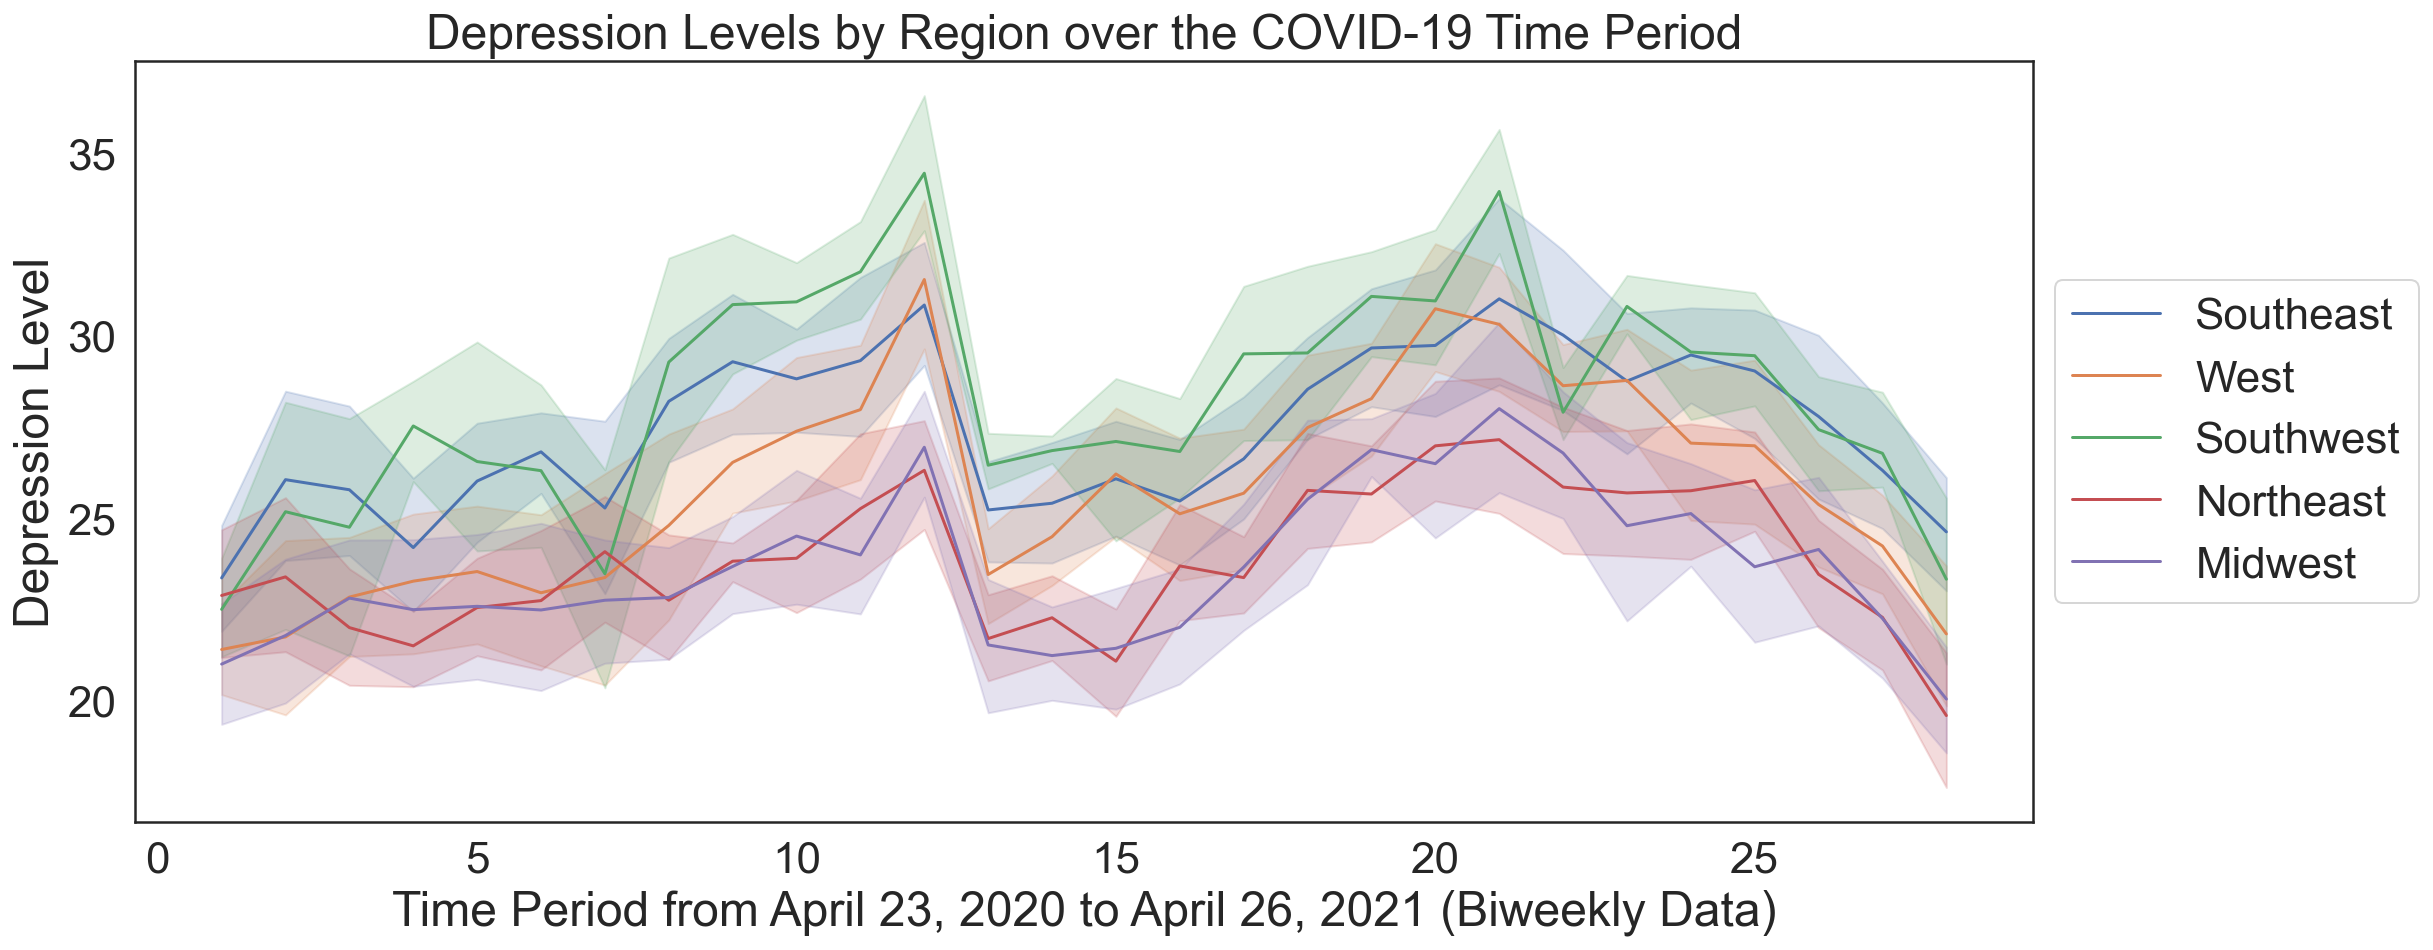

In [31]:
dep_reg_plt = sns.lineplot(data=table_depression_by_region, x='Time Period', y='Depression Level', hue='Region')

dep_reg_plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

dep_reg_plt.set(xlabel="Time Period from April 23, 2020 to April 26, 2021 (Biweekly Data)")

dep_reg_plt.set_title('Depression Levels by Region over the COVID-19 Time Period');

In [32]:
table_depression_by_age = table_depression_by_age.rename(columns={'Value': 'Depression Level'})
table_depression_by_age.head()

Indicator   Group          State       Subgroup  \
1  Symptoms of Depressive Disorder  By Age  United States  18 - 29 years   
2  Symptoms of Depressive Disorder  By Age  United States  30 - 39 years   
3  Symptoms of Depressive Disorder  By Age  United States  40 - 49 years   
4  Symptoms of Depressive Disorder  By Age  United States  50 - 59 years   
5  Symptoms of Depressive Disorder  By Age  United States  60 - 69 years   

   Time Period Time Period Label  Depression Level  Low CI  High CI  
1            1    Apr 23 - May 5              32.7    30.2     35.2  
2            1    Apr 23 - May 5              25.7    24.1     27.3  
3            1    Apr 23 - May 5              24.8    23.3     26.2  
4            1    Apr 23 - May 5              23.2    21.5     25.0  
5            1    Apr 23 - May 5              18.4    17.0     19.7

#### Here we will take a look at the distributions of each of the depression dataset broken down by age group over time to look for any patterns between the different age groups and their depression levels over the COVID-19 time period. We find that the 18-29 age group consistently has higher levels of depression compared to other age groups in the United States, and that the 70-79 and 80 plus age groups tend to have lower levels of depression compared to other age groups throughout this time period.


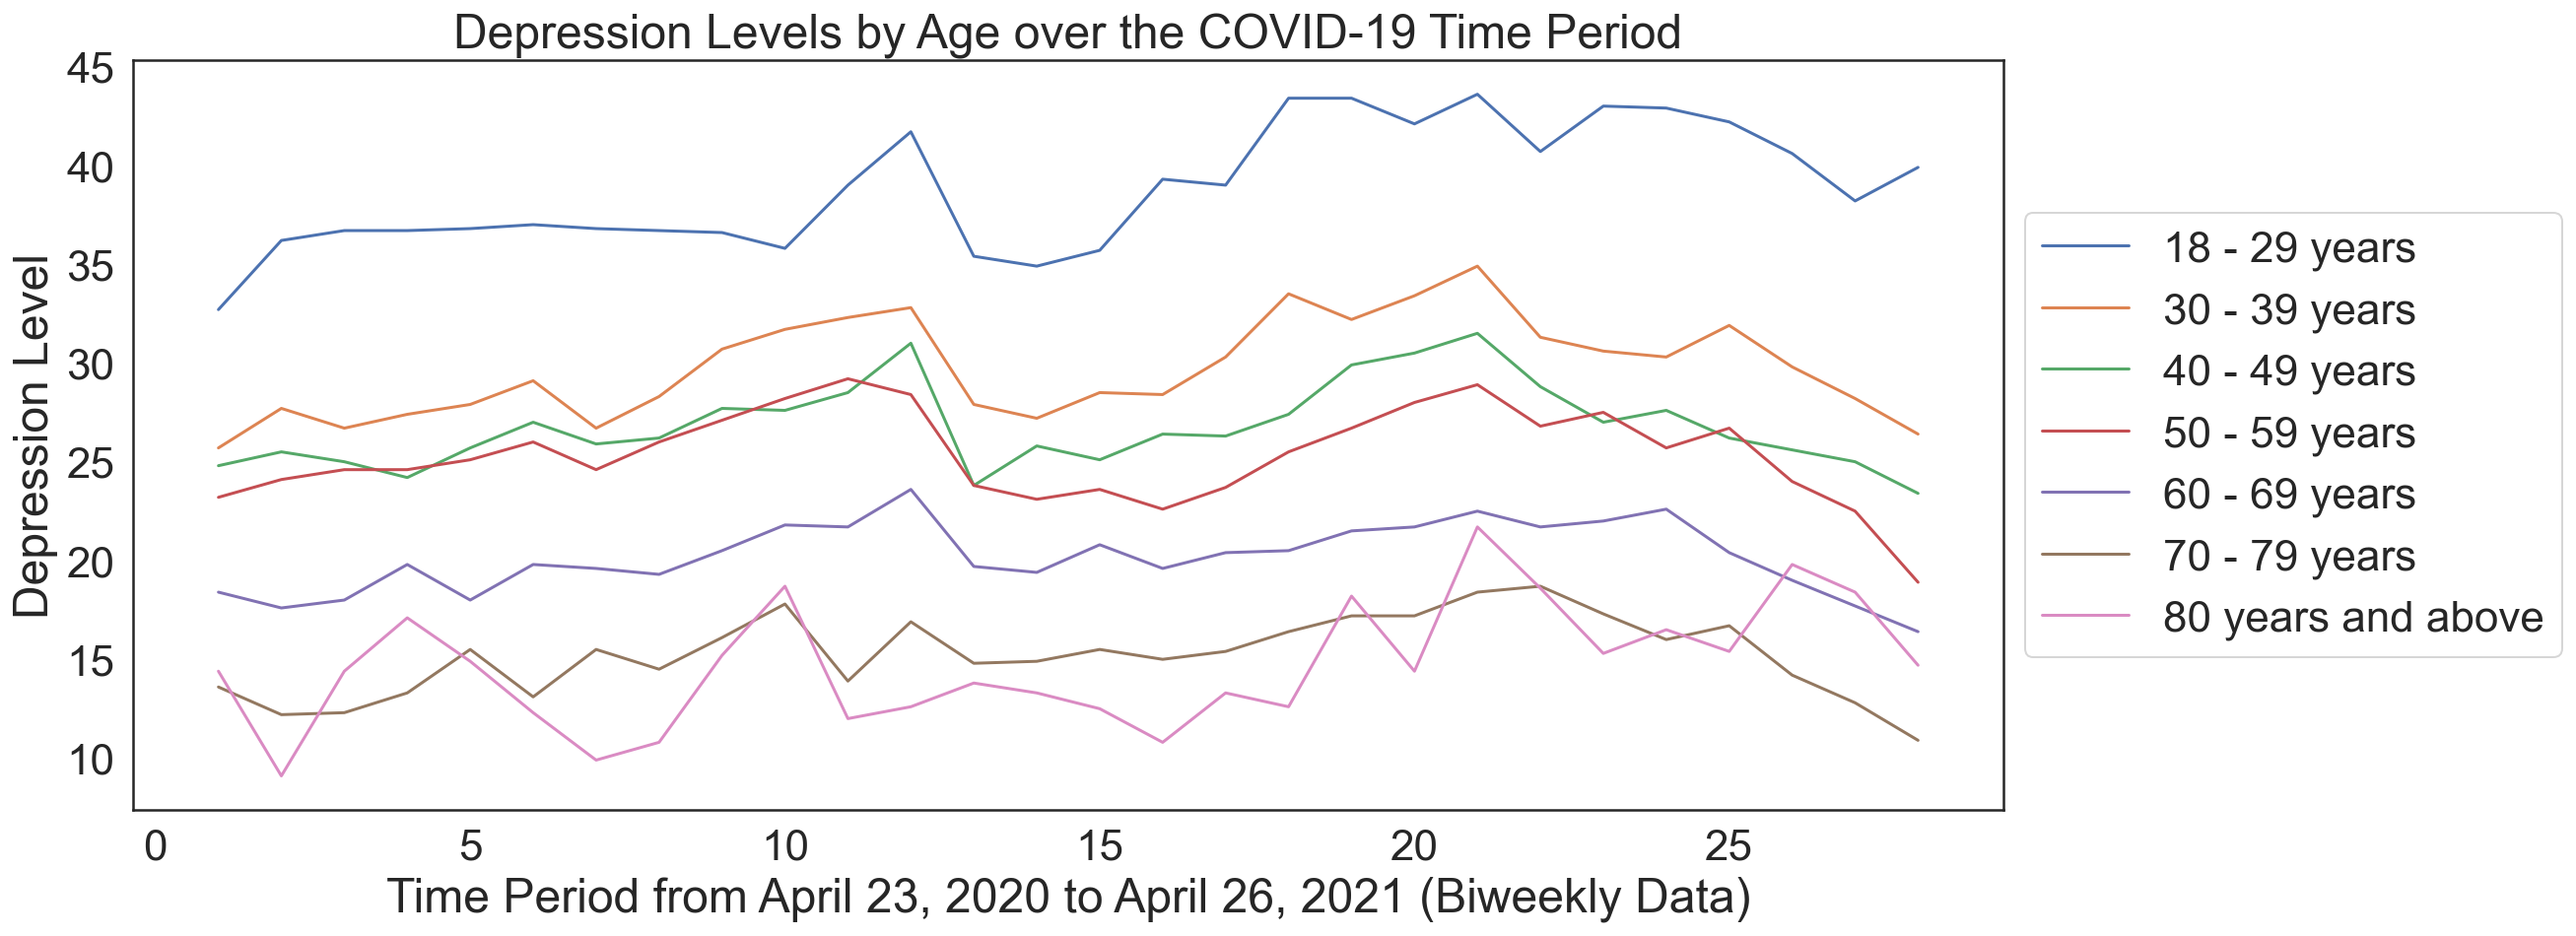

In [33]:
dep_age_plt = sns.lineplot(data=table_depression_by_age, x='Time Period', y='Depression Level', hue='Subgroup')

dep_age_plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

dep_age_plt.set(xlabel="Time Period from April 23, 2020 to April 26, 2021 (Biweekly Data)")

dep_age_plt.set_title('Depression Levels by Age over the COVID-19 Time Period');

#### Here we will take a look at the distributions of each of the anxiety dataset broken down by age and region to look for any unreasonable values. There does not seem to be any unreasonable values in these datasets. The distributions of anxiety levels by region seem to be normally distributed. The distribution levels by age seem to be fairly normally distrubuted, but we may need to convert this data into ordinal data so we can carry out analysis on this distribution.

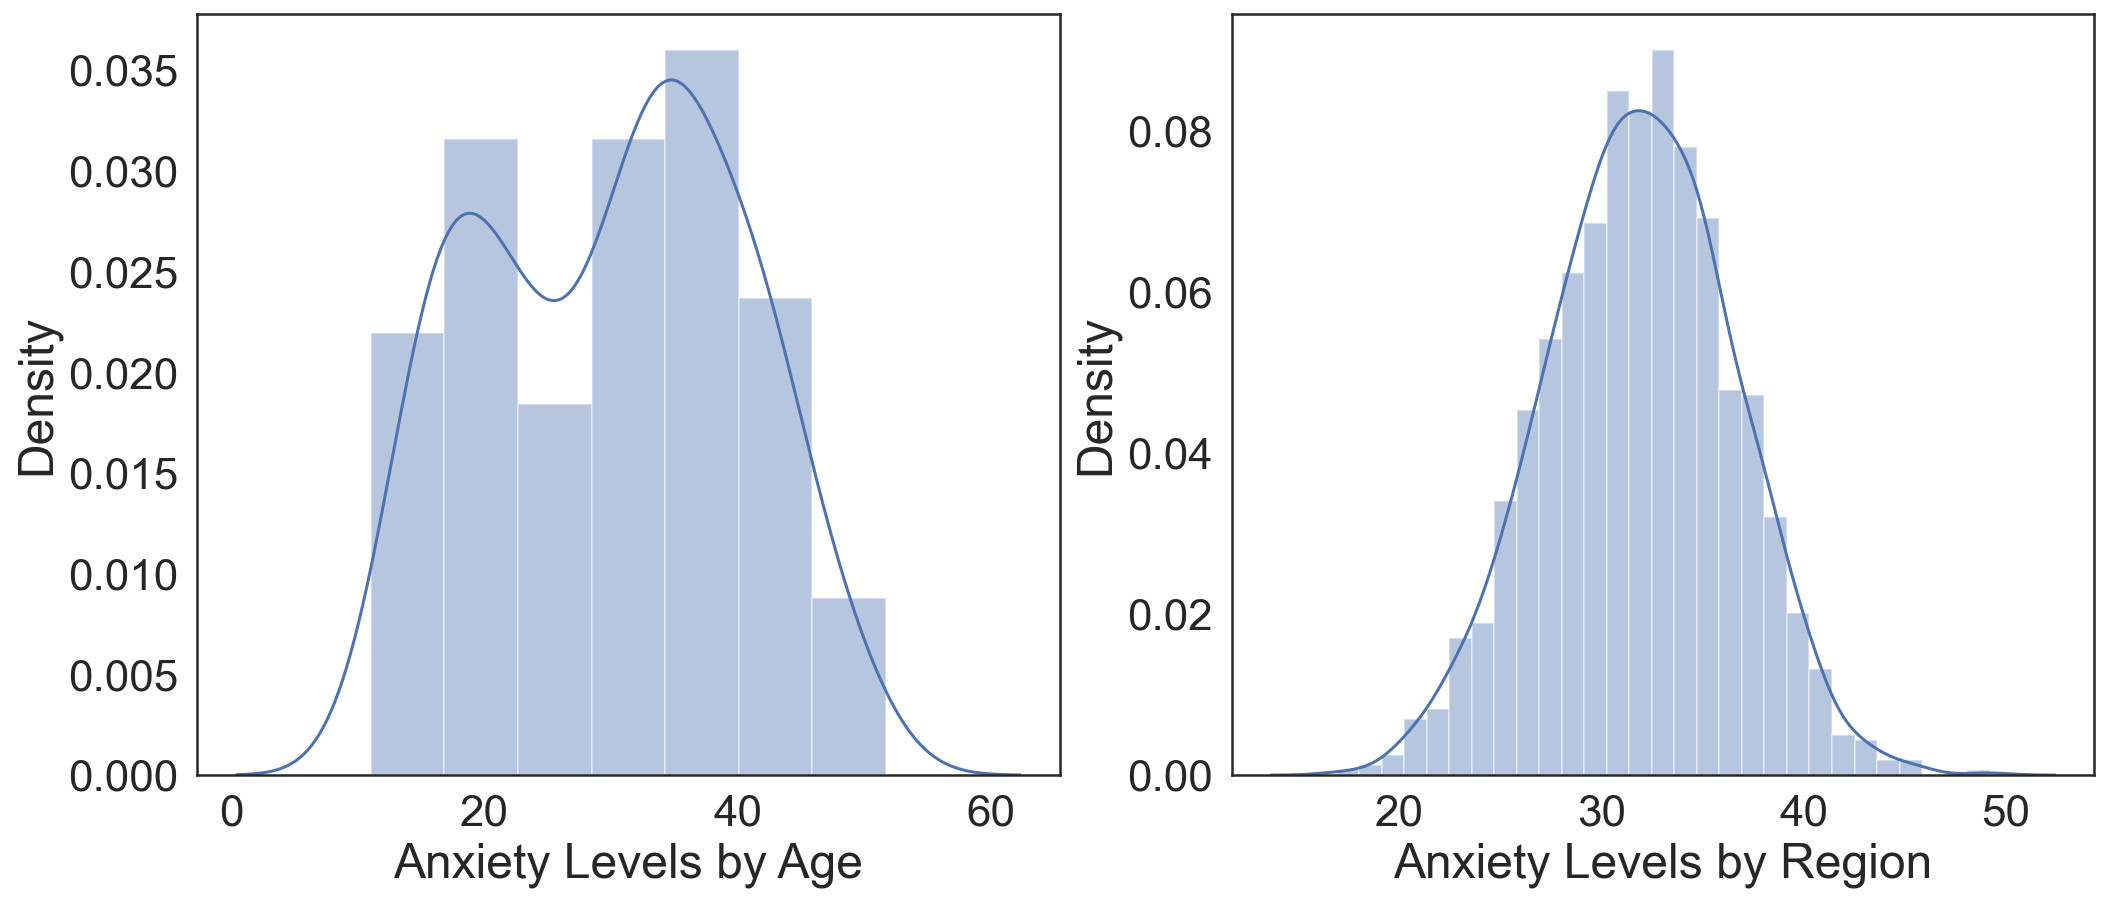

In [34]:
plt.subplot(1, 2, 1)
sns.distplot(table_anxiety_by_age['Value'])
plt.xlabel('Anxiety Levels by Age')

plt.subplot(1, 2, 2)
sns.distplot(table_anxiety_by_region['Value'])
plt.xlabel('Anxiety Levels by Region');

In [35]:
table_anxiety_by_region = table_anxiety_by_region.rename(columns={'State': 'Region', 'Value': 'Anxiety Level'})
table_anxiety_by_region.head()

Indicator     Group     Region    Subgroup  \
89  Symptoms of Anxiety Disorder  By State  Southeast     Alabama   
90  Symptoms of Anxiety Disorder  By State       West      Alaska   
91  Symptoms of Anxiety Disorder  By State  Southwest     Arizona   
92  Symptoms of Anxiety Disorder  By State  Southeast    Arkansas   
93  Symptoms of Anxiety Disorder  By State       West  California   

    Time Period Time Period Label  Anxiety Level  Low CI  High CI  
89            1    Apr 23 - May 5           25.6    20.7     30.9  
90            1    Apr 23 - May 5           27.7    24.8     30.7  
91            1    Apr 23 - May 5           32.3    28.0     36.8  
92            1    Apr 23 - May 5           33.7    28.2     39.6  
93            1    Apr 23 - May 5           30.8    28.2     33.5

#### Here we will take a look at the distributions of each of the anxiety dataset broken down by region over time to look for any patterns between the different regions and their anxiety levels over the COVID-19 time period. We find that the Southwest region consistently has higher levels of anxiety compared to the other regions of the United States, and that the Midwest region tend to have lower levels of anxiety compared to the other regions throughout this time period

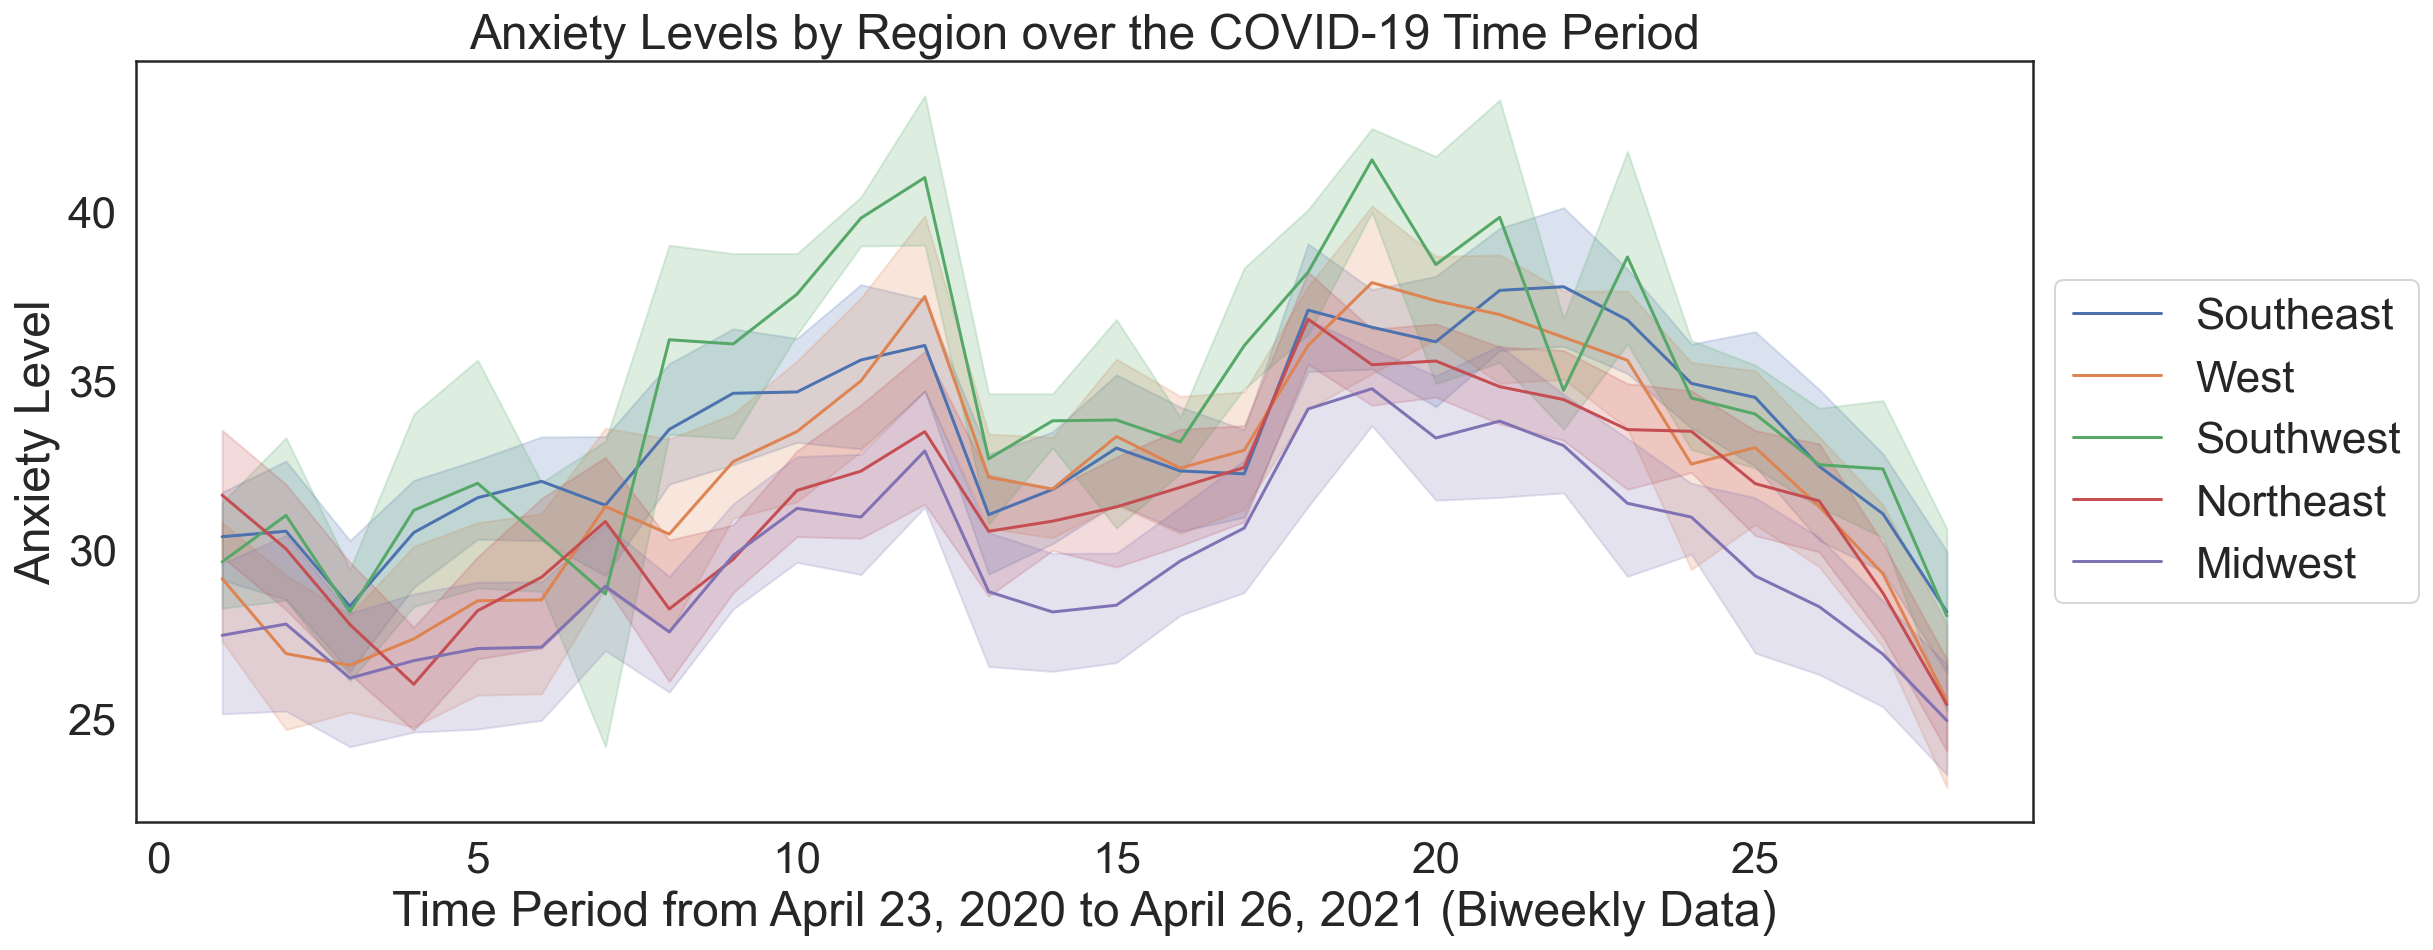

In [36]:
anx_reg_plt = sns.lineplot(data=table_anxiety_by_region, x='Time Period', y='Anxiety Level', hue='Region')

anx_reg_plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

anx_reg_plt.set(xlabel="Time Period from April 23, 2020 to April 26, 2021 (Biweekly Data)")

anx_reg_plt.set_title('Anxiety Levels by Region over the COVID-19 Time Period');

In [37]:
table_anxiety_by_age = table_anxiety_by_age.rename(columns={'Value': 'Anxiety Level'})
table_anxiety_by_age.head()

Indicator   Group          State       Subgroup  \
71  Symptoms of Anxiety Disorder  By Age  United States  18 - 29 years   
72  Symptoms of Anxiety Disorder  By Age  United States  30 - 39 years   
73  Symptoms of Anxiety Disorder  By Age  United States  40 - 49 years   
74  Symptoms of Anxiety Disorder  By Age  United States  50 - 59 years   
75  Symptoms of Anxiety Disorder  By Age  United States  60 - 69 years   

    Time Period Time Period Label  Anxiety Level  Low CI  High CI  
71            1    Apr 23 - May 5           40.2    38.1     42.4  
72            1    Apr 23 - May 5           34.4    32.6     36.1  
73            1    Apr 23 - May 5           34.1    32.1     36.2  
74            1    Apr 23 - May 5           31.0    29.0     33.1  
75            1    Apr 23 - May 5           24.9    23.6     26.3

#### Here we will take a look at the distributions of each of the anxiety dataset broken down by age group over time to look for any patterns between the age groups and their anxiety levels over the COVID-19 time period. We find that the 18-29 age group consistently has higher levels of anxiety compared to other age groups in the United States, and that the 70-79 and 80 plus age groups tend to have lower levels of depression compared to other age groups throughout this time period.

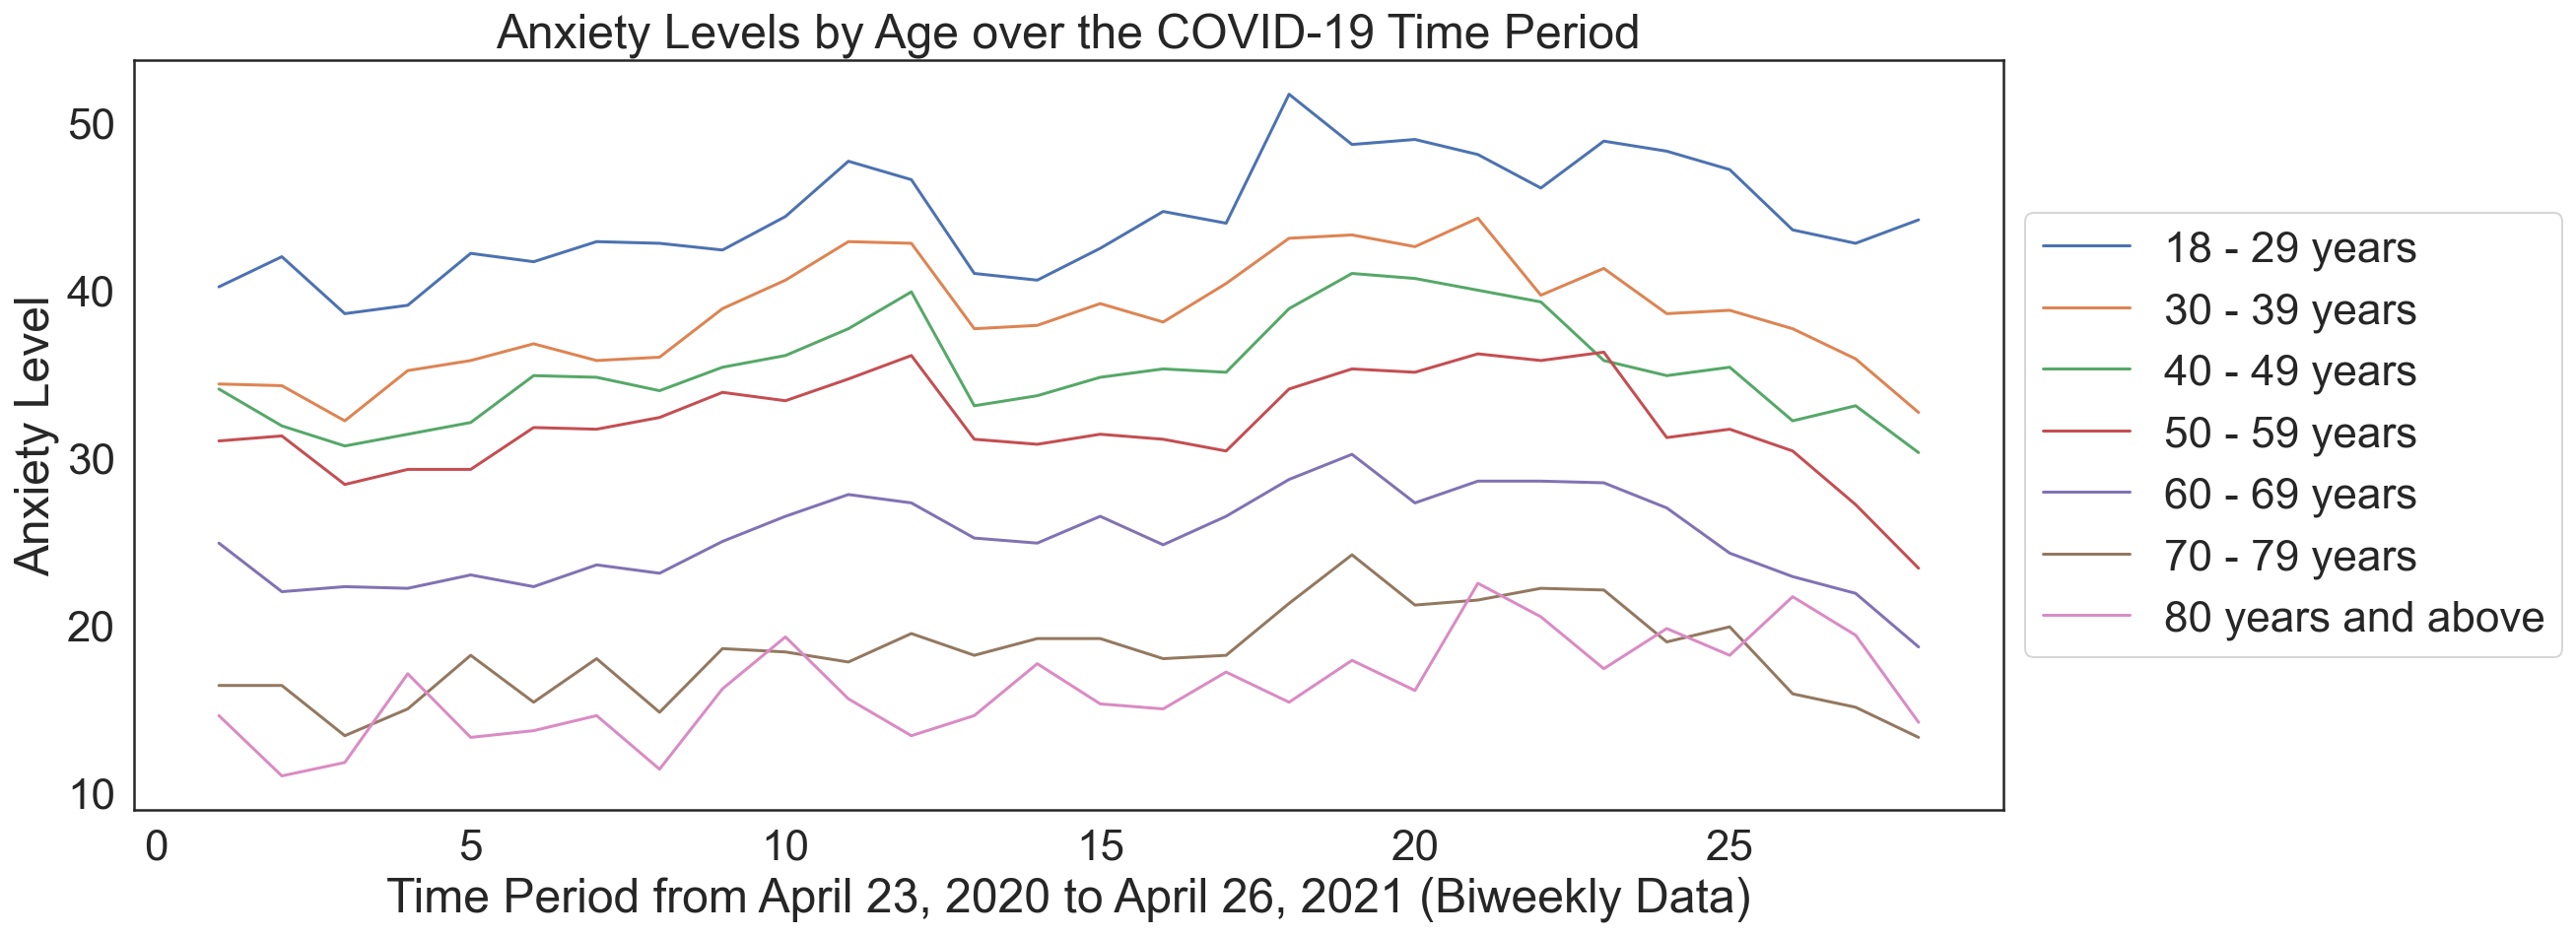

In [38]:
anx_age_plt = sns.lineplot(data=table_anxiety_by_age, x='Time Period', y='Anxiety Level', hue='Subgroup')

anx_age_plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

anx_age_plt.set(xlabel="Time Period from April 23, 2020 to April 26, 2021 (Biweekly Data)")

anx_age_plt.set_title('Anxiety Levels by Age over the COVID-19 Time Period');

#### Here we will take a look at the distributions of each of the anxiety or depression dataset broken down by age and region to look for any unreasonable values. There does not seem to be any unreasonable values in these datasets. The distributions of anxiety or depression levels by region seem to be normally distributed. The distribution levels by age seem to be fairly normally distrubuted, but we may need to convert this data into ordinal data so we can carry out analysis on this distribution.

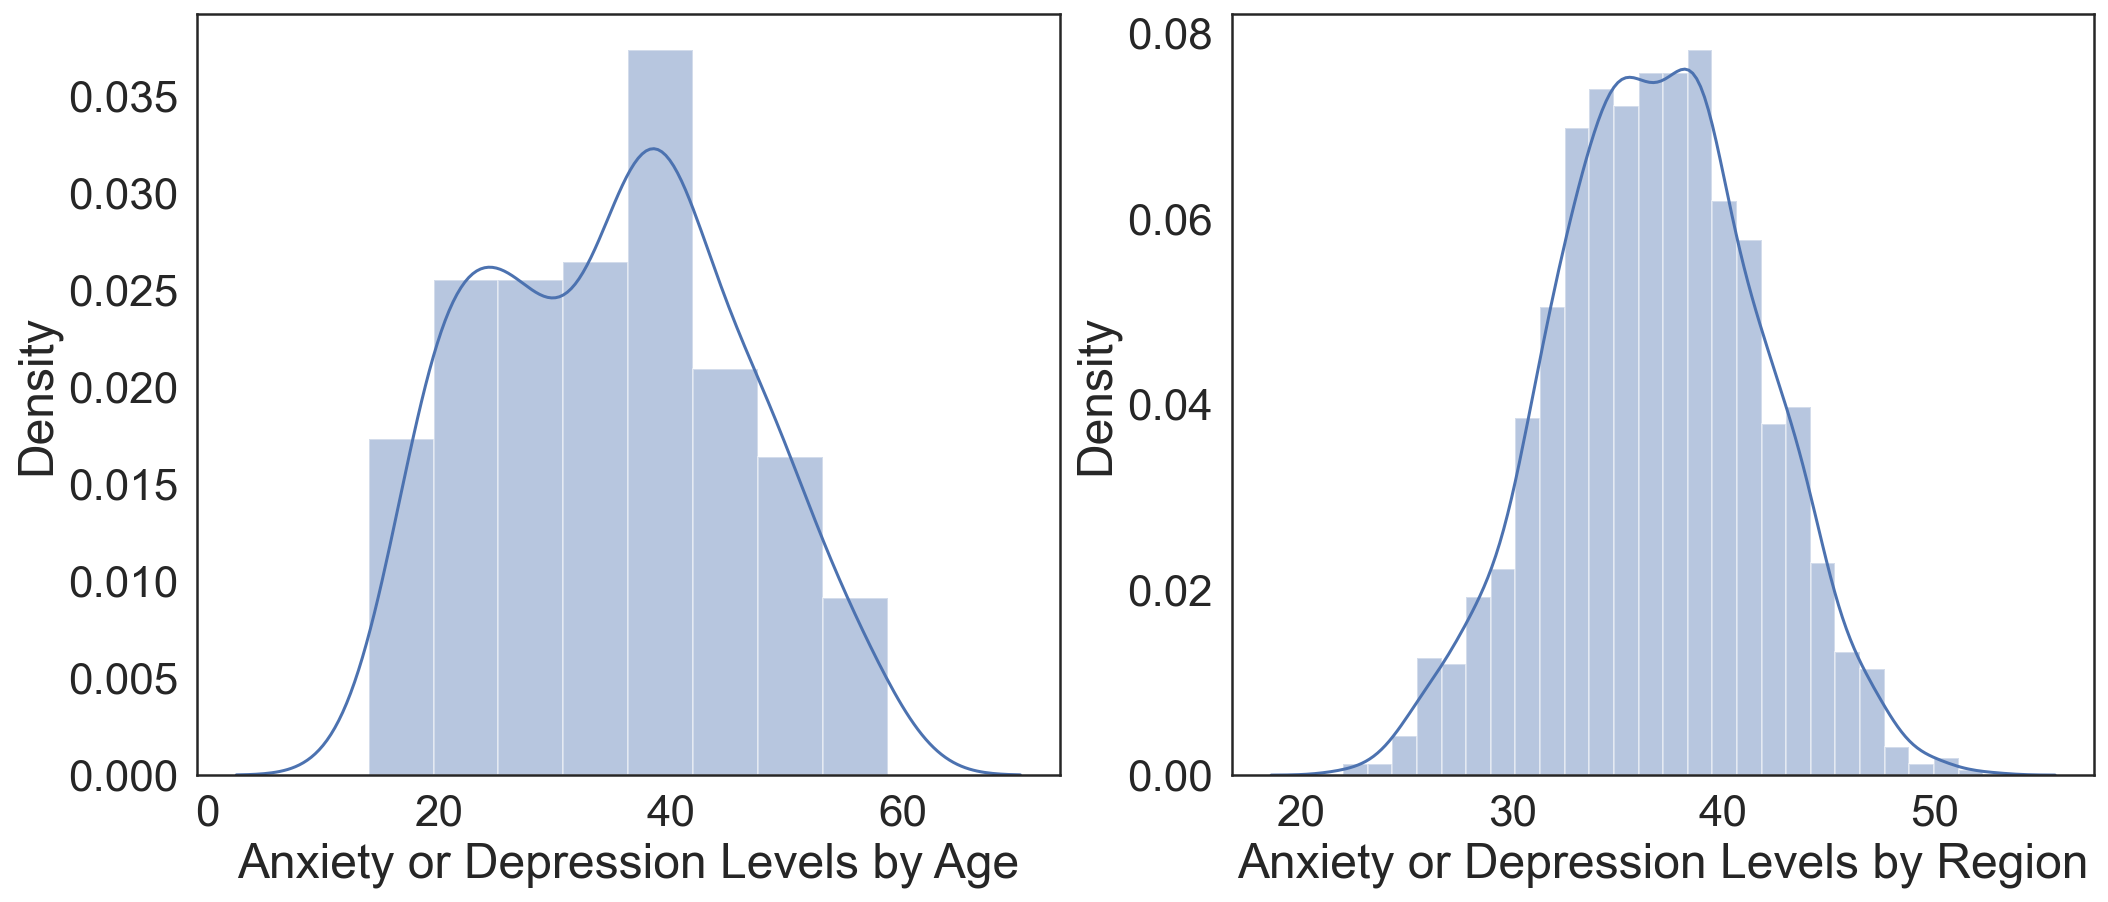

In [39]:
plt.subplot(1, 2, 1)
sns.distplot(table_anxiety_or_depression_by_age['Value'])
plt.xlabel('Anxiety or Depression Levels by Age')

plt.subplot(1, 2, 2)
sns.distplot(table_anxiety_or_depression_by_region['Value'])
plt.xlabel('Anxiety or Depression Levels by Region');

In [40]:
table_anxiety_or_depression_by_region = table_anxiety_or_depression_by_region.rename(columns={
    'State': 'Region', 'Value': 'Anxiety or Depression Level'})
table_anxiety_or_depression_by_region.head()

Indicator     Group     Region  \
159  Symptoms of Anxiety Disorder or Depressive Dis...  By State  Southeast   
160  Symptoms of Anxiety Disorder or Depressive Dis...  By State       West   
161  Symptoms of Anxiety Disorder or Depressive Dis...  By State  Southwest   
162  Symptoms of Anxiety Disorder or Depressive Dis...  By State  Southeast   
163  Symptoms of Anxiety Disorder or Depressive Dis...  By State       West   

       Subgroup  Time Period Time Period Label  Anxiety or Depression Level  \
159     Alabama            1    Apr 23 - May 5                         30.3   
160      Alaska            1    Apr 23 - May 5                         31.5   
161     Arizona            1    Apr 23 - May 5                         36.4   
162    Arkansas            1    Apr 23 - May 5                         38.0   
163  California            1    Apr 23 - May 5                         37.4   

     Low CI  High CI  
159    24.8     36.2  
160    28.8     34.4  
161    32.3     40.7  
162    33.1     43.1  
163    34.2     40.6

#### Here we will take a look at the distributions of each of the anxiety or depression dataset broken down by region over time to look for any patterns between the different regions and their anxiety or depression levels over the COVID-19 time period. We find that the Southwest region consistently has higher levels of anxiety or depression compared to the other regions of the United States, and that the Midwest region tend to have lower levels of anxiety or depression compared to the other regions throughout this time period

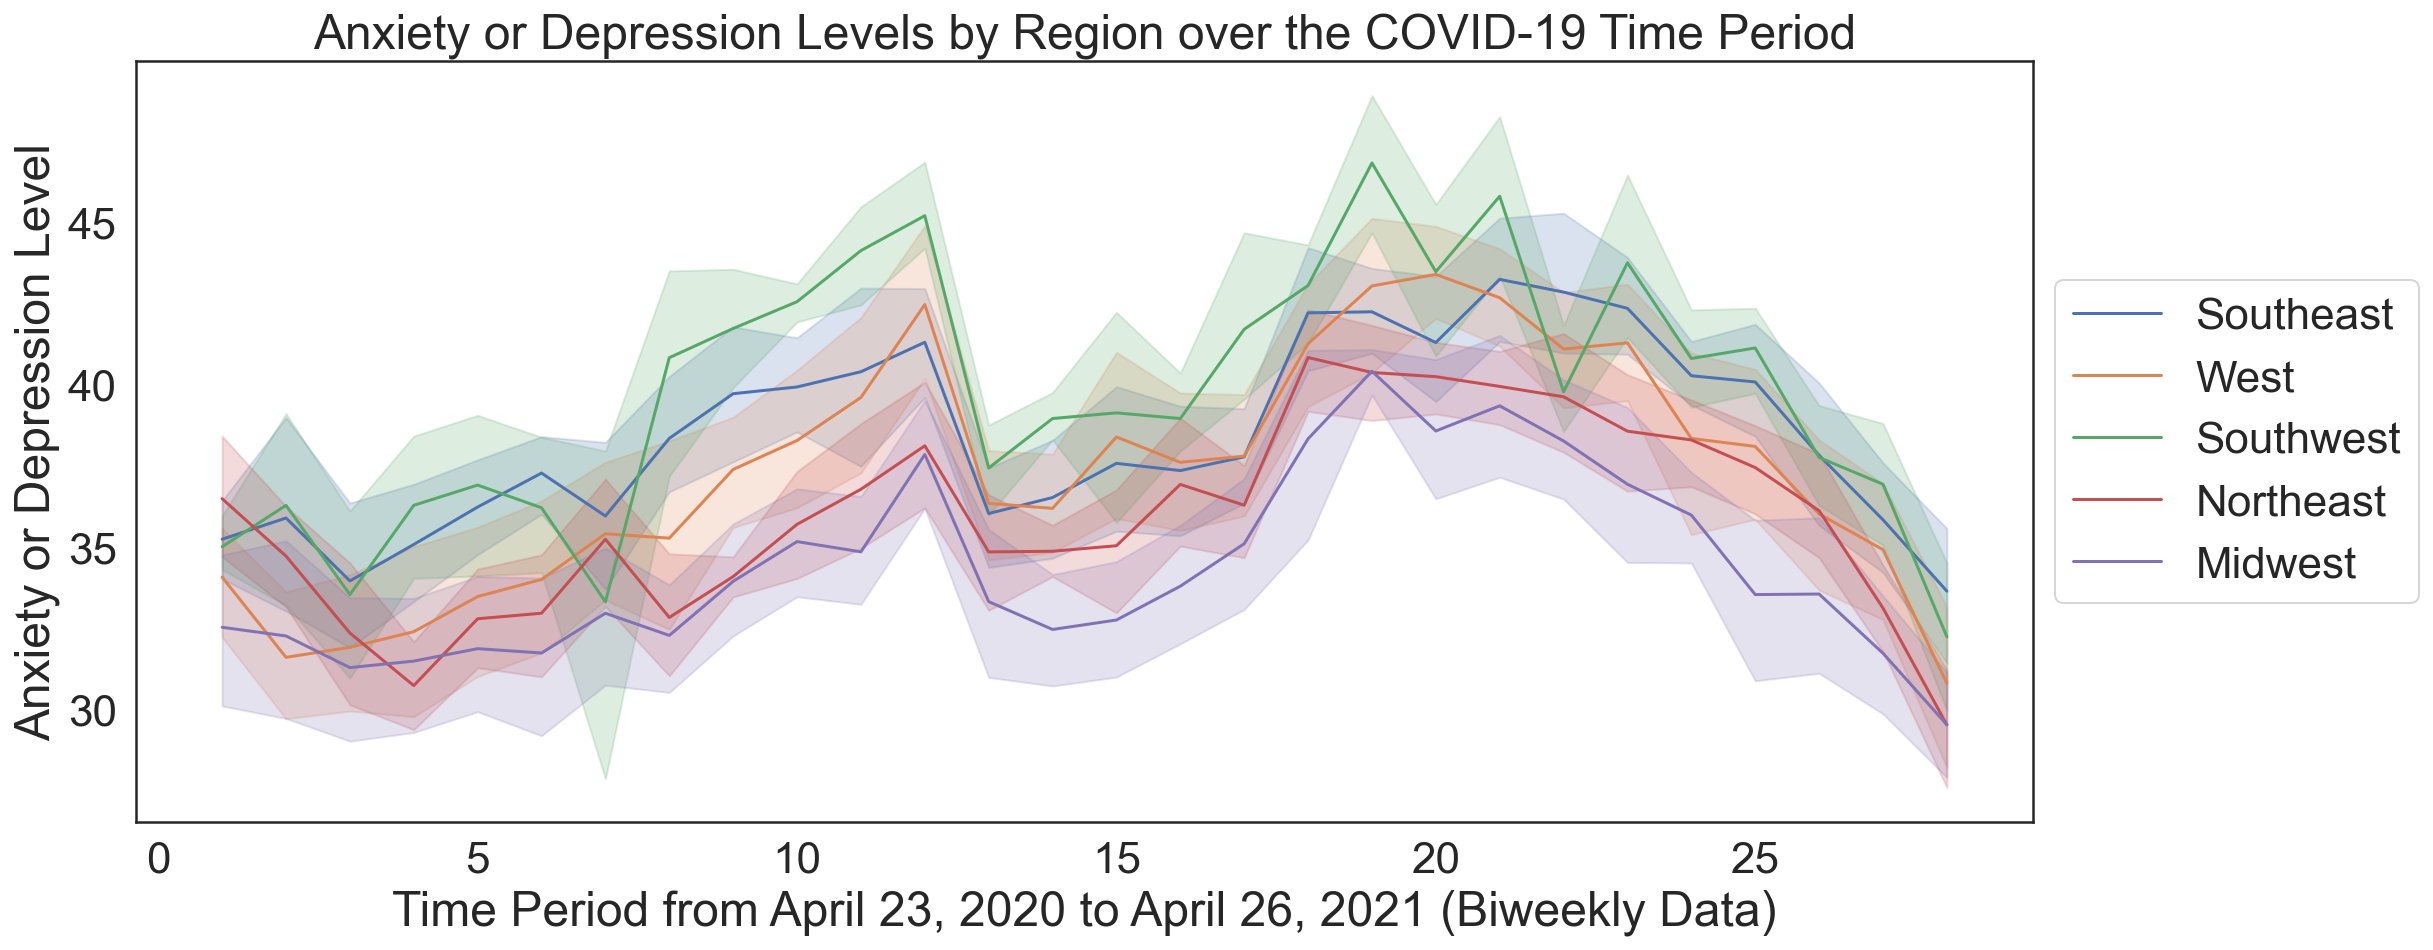

In [41]:
anx_or_dep_reg_plt = sns.lineplot(data=table_anxiety_or_depression_by_region,
                                  x='Time Period', y='Anxiety or Depression Level', hue='Region')

anx_or_dep_reg_plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

anx_or_dep_reg_plt.set(xlabel="Time Period from April 23, 2020 to April 26, 2021 (Biweekly Data)")

anx_or_dep_reg_plt.set_title('Anxiety or Depression Levels by Region over the COVID-19 Time Period');

In [42]:
table_anxiety_or_depression_by_age = table_anxiety_or_depression_by_age.rename(columns={
    'State': 'Region', 'Value': 'Anxiety or Depression Level'})
table_anxiety_or_depression_by_age.head()

Indicator   Group         Region  \
141  Symptoms of Anxiety Disorder or Depressive Dis...  By Age  United States   
142  Symptoms of Anxiety Disorder or Depressive Dis...  By Age  United States   
143  Symptoms of Anxiety Disorder or Depressive Dis...  By Age  United States   
144  Symptoms of Anxiety Disorder or Depressive Dis...  By Age  United States   
145  Symptoms of Anxiety Disorder or Depressive Dis...  By Age  United States   

          Subgroup  Time Period Time Period Label  \
141  18 - 29 years            1    Apr 23 - May 5   
142  30 - 39 years            1    Apr 23 - May 5   
143  40 - 49 years            1    Apr 23 - May 5   
144  50 - 59 years            1    Apr 23 - May 5   
145  60 - 69 years            1    Apr 23 - May 5   

     Anxiety or Depression Level  Low CI  High CI  
141                         46.8    44.3     49.3  
142                         39.6    37.7     41.5  
143                         38.9    37.2     40.7  
144                         35.8    34.0     37.7  
145                         28.9    27.6     30.3

#### Here we will take a look at the distribution of the anxiety or depression dataset broken down by age group over time to look for any patterns between the age groups and their anxiety or depression levels over the COVID-19 time period. We find that 18-29 year olds have the highest levels of depression or anxiety. 80 year olds and above have the lowest levels.

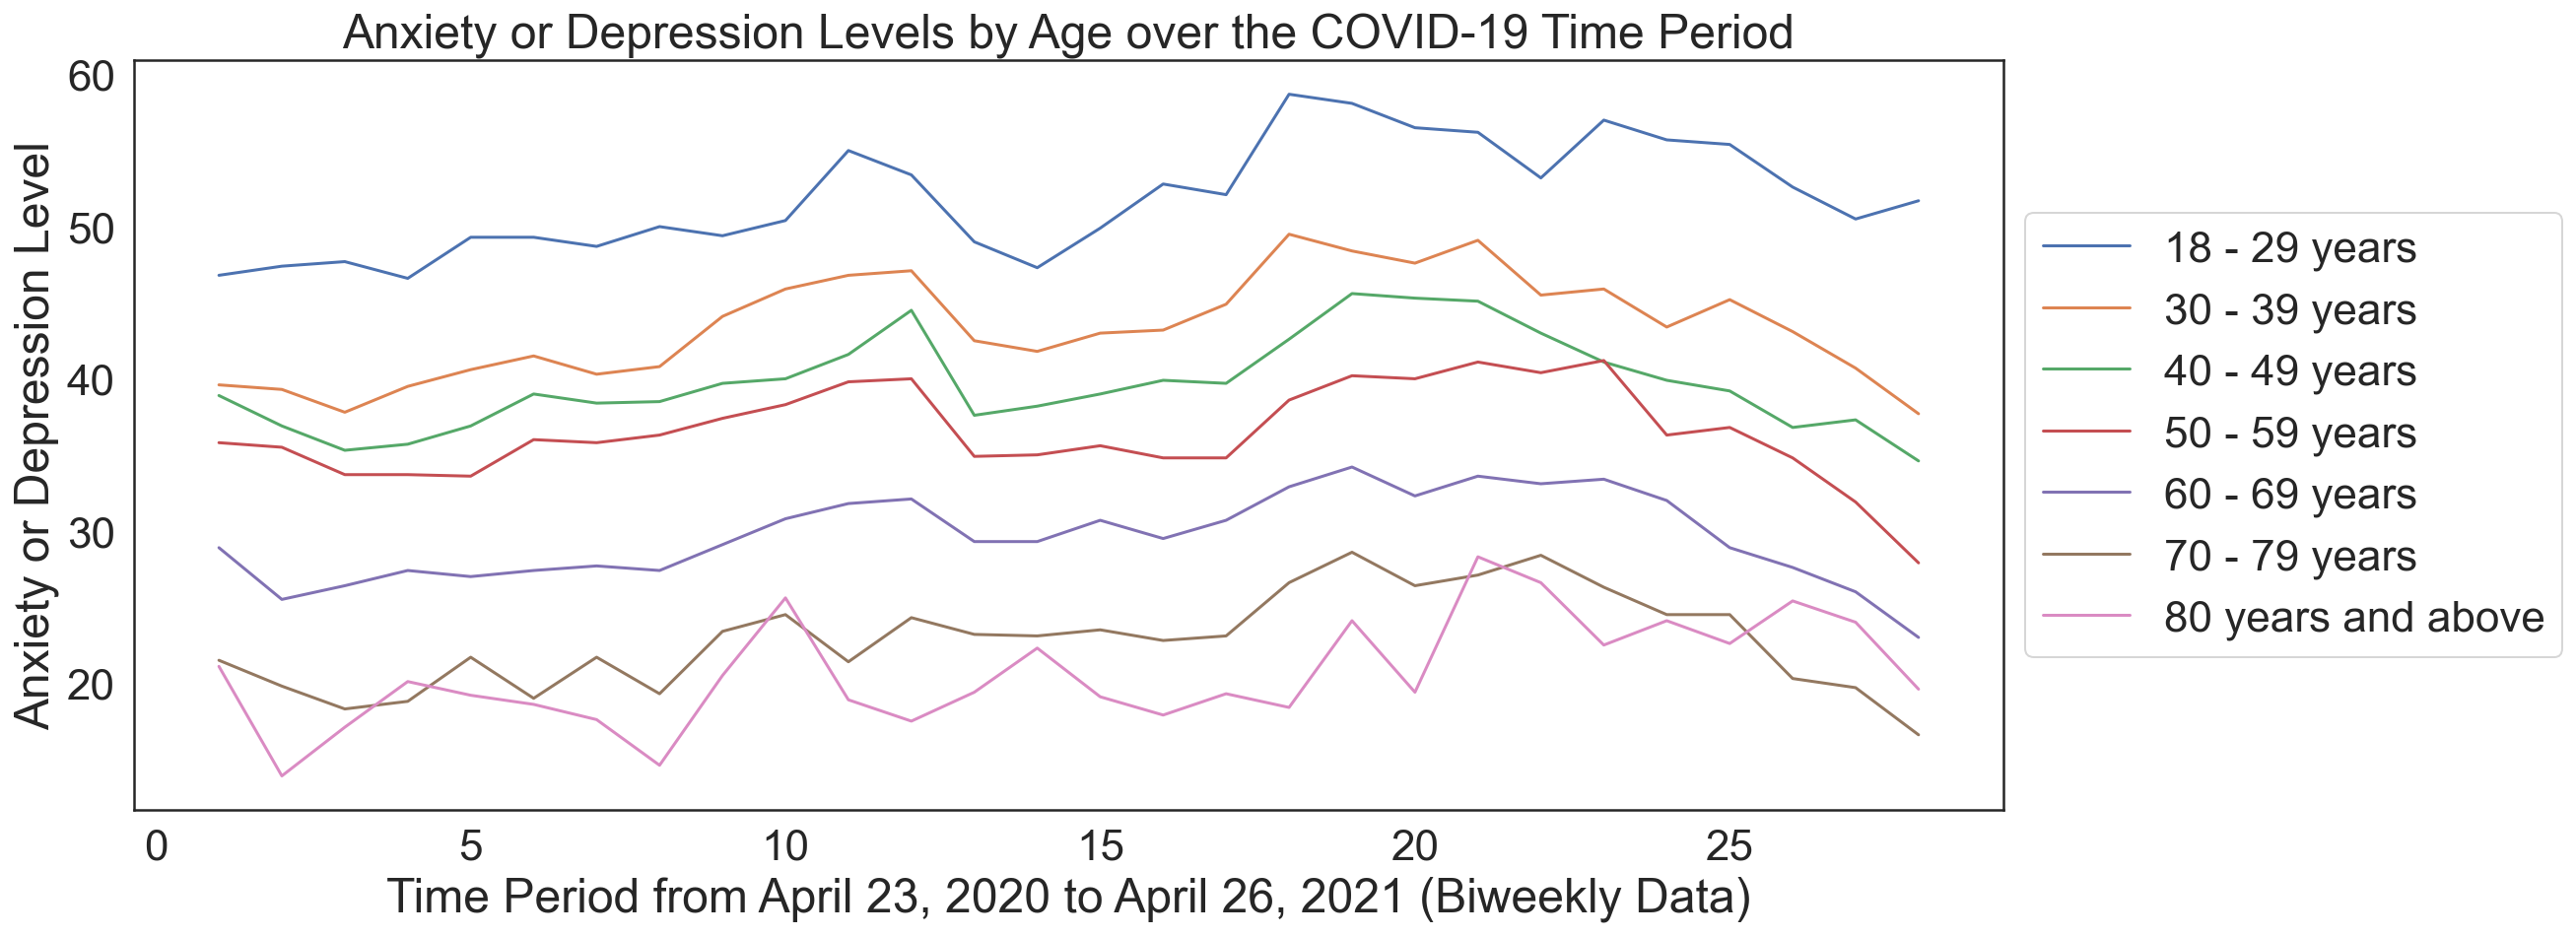

In [43]:
anx_dep_age_plt = sns.lineplot(data=table_anxiety_or_depression_by_age, x='Time Period',
                               y='Anxiety or Depression Level', hue='Subgroup')

anx_dep_age_plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

anx_dep_age_plt.set(xlabel="Time Period from April 23, 2020 to April 26, 2021 (Biweekly Data)")

anx_dep_age_plt.set_title('Anxiety or Depression Levels by Age over the COVID-19 Time Period');

## Part III: Data Analysis and Results of Part II

### Our Exploratory Data Analysis of our data on mental health disorders throughout the COVID-19 time period showed us that certain groups seemed to have consistently higher and lower levels of depression and anxiety compared to others.  In particular the youngest age group, (18-29), seemed to have higher levels of depression and anxiety compared to the other age groups.  Additionally, we observed that the Southwest region showed higher levels of depression and anxiety compared to other regions of the US.



#### We wanted to further look into these trends that we observed between groups by conducting some Difference in Means t-tests so we could conclude if these differences in anxiety and depression levels between these groups were because of random chance alone, or because there were statistically significant differences in the mean levels of anxiety and depression between these groups.

## 1. Southwest Region t-tests

### 1.1 Here we will conduct a Difference in means t-test between the mean level of depression of the Southwest region and all other regions of the United States.

$H_0: \bar x_{SouthwestDepressionLevels} = \bar y_{OtherRegionsDepressionLevels}$

$H_a: \bar x_{SouthwestDepressionLevels} \ne \bar y_{OtherRegionsDepressionLevels}$

#### First we will construct a boolean column from our table_depression_by_region table called Southwest that indicates if this row contained data from a state from the Southwest region or not.  

In [44]:
southwest = table_depression_by_region["Region"] == "Southwest"

table_depression_by_region["Southwest"] = southwest

table_depression_by_region.head()

Indicator     Group     Region    Subgroup  \
19  Symptoms of Depressive Disorder  By State  Southeast     Alabama   
20  Symptoms of Depressive Disorder  By State       West      Alaska   
21  Symptoms of Depressive Disorder  By State  Southwest     Arizona   
22  Symptoms of Depressive Disorder  By State  Southeast    Arkansas   
23  Symptoms of Depressive Disorder  By State       West  California   

    Time Period Time Period Label  Depression Level  Low CI  High CI  \
19            1    Apr 23 - May 5              18.6    14.6     23.1   
20            1    Apr 23 - May 5              19.2    16.8     21.8   
21            1    Apr 23 - May 5              22.4    19.4     25.5   
22            1    Apr 23 - May 5              26.6    22.3     31.3   
23            1    Apr 23 - May 5              25.4    22.5     28.6   

    Southwest  
19      False  
20      False  
21       True  
22      False  
23      False

#### Now we will quickly look at the mean levels of Depression for the Southwest region compared to all other regions

In [45]:
table_depression_by_region.groupby(['Southwest'])['Depression Level'].mean()

Southwest
False    25.258511
True     28.249107
Name: Depression Level, dtype: float64

#### Here we will divide our data into two groups, the Southwest region and all other regions

In [46]:
sw_dep = table_depression_by_region.where(table_depression_by_region.Southwest==True).dropna()['Depression Level']
others_dep = table_depression_by_region.where(
    table_depression_by_region.Southwest==False).dropna()['Depression Level']

#### Here we will run the code that runs our Difference in means t-test between the mean level of depression of the Southwest region and all other regions of the United States. 

In [47]:
ttest_ind(sw_dep, others_dep)

Ttest_indResult(statistic=7.404657918404427, pvalue=2.2631749295136785e-13)

The p-value here is $2.263\times 10^{-13}$ ...which means that observing this difference in means due to random chance alone is very unlikely. 

Consequently, we reject the null in favor of the alternative hypothesis, concluding that the means between the levels of depression in the Southwest region are not the same as the levels of depression in the other regions of the United States.

### 1.2 Here we will conduct a Difference in means t-test between the mean level of depression of the Southwest region and all other regions of the United States.

$H_0: \bar x_{SouthwestAnxietyLevels} = \bar y_{OtherRegionsAnxietyLevels}$

$H_a: \bar x_{SouthwestAnxietyLevels} \ne \bar y_{OtherRegionsAnxietyLevels}$

#### First we will construct a boolean column from our table_anxiety_by_region table called Southwest that indicates if this row contained data from a state from the Southwest region or not.  

In [48]:
southwest = table_anxiety_by_region["Region"] == "Southwest"

table_anxiety_by_region["Southwest"] = southwest

table_anxiety_by_region.head()

Indicator     Group     Region    Subgroup  \
89  Symptoms of Anxiety Disorder  By State  Southeast     Alabama   
90  Symptoms of Anxiety Disorder  By State       West      Alaska   
91  Symptoms of Anxiety Disorder  By State  Southwest     Arizona   
92  Symptoms of Anxiety Disorder  By State  Southeast    Arkansas   
93  Symptoms of Anxiety Disorder  By State       West  California   

    Time Period Time Period Label  Anxiety Level  Low CI  High CI  Southwest  
89            1    Apr 23 - May 5           25.6    20.7     30.9      False  
90            1    Apr 23 - May 5           27.7    24.8     30.7      False  
91            1    Apr 23 - May 5           32.3    28.0     36.8       True  
92            1    Apr 23 - May 5           33.7    28.2     39.6      False  
93            1    Apr 23 - May 5           30.8    28.2     33.5      False

#### Now we will quickly look at the mean levels of Anxiety for the Southwest region compared to all other regions

In [49]:
table_anxiety_by_region.groupby(['Southwest'])['Anxiety Level'].mean()

Southwest
False    31.650152
True     34.417857
Name: Anxiety Level, dtype: float64

#### Here we will divide our data into two groups, the Southwest region and all other regions

In [50]:
sw_anx = table_anxiety_by_region.where(table_anxiety_by_region.Southwest==True).dropna()['Anxiety Level']
others_anx = table_anxiety_by_region.where(table_anxiety_by_region.Southwest==False).dropna()['Anxiety Level']

#### Here we will run the code that runs our Difference in means t-test between the mean level of anxiety of the Southwest region and all other regions of the United States. 

In [51]:
ttest_ind(sw_anx, others_anx)

Ttest_indResult(statistic=6.118350825268454, pvalue=1.2253404948336805e-09)

The p-value here is $1.225\times 10^{-09}$ ...which means that observing this difference in means due to random chance alone is very unlikely. 

Consequently, we reject the null in favor of the alternative hypothesis, concluding that the means between the levels of anxiety in the Southwest region are not the same as the levels of anxiety in the other regions of the United States.

### 1.3 Here we will conduct a Difference in means t-test between the mean level of anxiety or depression of the Southwest region and all other regions of the United States.

$H_0: \bar x_{SouthwestAnxietyandDepressionLevels} = \bar y_{OtherRegionsAnxietyandDepressionLevels}$

$H_a: \bar x_{SouthwestAnxietyandDepressionLevels} \ne \bar y_{OtherRegionsAnxietyandDepressionLevels}$

#### First we will construct a boolean column from our table_anxiety_or_depression_by_region table called Southwest that indicates if this row contained data from a state from the Southwest region or not.  

In [52]:
southwest = table_anxiety_or_depression_by_region["Region"] == "Southwest"

table_anxiety_or_depression_by_region["Southwest"] = southwest

table_anxiety_or_depression_by_region.head()

Indicator     Group     Region  \
159  Symptoms of Anxiety Disorder or Depressive Dis...  By State  Southeast   
160  Symptoms of Anxiety Disorder or Depressive Dis...  By State       West   
161  Symptoms of Anxiety Disorder or Depressive Dis...  By State  Southwest   
162  Symptoms of Anxiety Disorder or Depressive Dis...  By State  Southeast   
163  Symptoms of Anxiety Disorder or Depressive Dis...  By State       West   

       Subgroup  Time Period Time Period Label  Anxiety or Depression Level  \
159     Alabama            1    Apr 23 - May 5                         30.3   
160      Alaska            1    Apr 23 - May 5                         31.5   
161     Arizona            1    Apr 23 - May 5                         36.4   
162    Arkansas            1    Apr 23 - May 5                         38.0   
163  California            1    Apr 23 - May 5                         37.4   

     Low CI  High CI  Southwest  
159    24.8     36.2      False  
160    28.8     34.4      False  
161    32.3     40.7       True  
162    33.1     43.1      False  
163    34.2     40.6      False

#### Now we will quickly look at the mean levels of Anxiety or Depression for the Southwest region compared to all other regions

In [53]:
table_anxiety_or_depression_by_region.groupby(['Southwest'])['Anxiety or Depression Level'].mean()

Southwest
False    36.528495
True     39.626786
Name: Anxiety or Depression Level, dtype: float64

#### Here we will divide our data into two groups, the Southwest region and all other regions

In [54]:
sw_anx_dep = table_anxiety_or_depression_by_region.where(
    table_anxiety_or_depression_by_region.Southwest==True).dropna()['Anxiety or Depression Level']
others_anx_dep = table_anxiety_or_depression_by_region.where(
    table_anxiety_or_depression_by_region.Southwest==False).dropna()['Anxiety or Depression Level']

#### Here we will run the code that runs our Difference in means t-test between the mean level of anxiety or depression of the Southwest region and all other regions of the United States. 

In [55]:
ttest_ind(sw_anx_dep, others_anx_dep)

Ttest_indResult(statistic=6.535689568970948, pvalue=8.848581366431525e-11)

The p-value here is $8.849\times 10^{-11}$ ...which means that observing this difference in means due to random chance alone is very unlikely. 

Consequently, we reject the null in favor of the alternative hypothesis, concluding that the means between the levels of anxiety or depression in the Southwest region are not the same as the levels of anxiety or depression in the other regions of the United States.

### 1.4 Conclusion about Southwest Region:

#### By conducting these 3 t-tests, we have shown that the mean levels  across the COVID-19 time period of the mental disorders in question, anxiety and depression, of the Southwest Region are not the same as those of the other regions of the United States.

## 2. 18-29 years Age Group t-tests 

### 2.1 Here we will conduct a Difference in means t-test between the mean level of depression of the (18-29) age group and all other age groups.

$H_0: \bar x_{(18-29)DepressionLevels} = \bar y_{OtherAgeGroupsDepressionLevels}$

$H_a: \bar x_{(18-29)DepressionLevels} \ne \bar y_{OtherAgeGroupsDepressionLevels}$

#### First we will construct a boolean column from our table_depression_by_age table called Youngest that indicates if this row contained data from a state from the youngest age group or not. 

In [56]:
youngest = table_depression_by_age["Subgroup"] == "18 - 29 years"

table_depression_by_age["Youngest"] = youngest

table_depression_by_age.head()

Indicator   Group          State       Subgroup  \
1  Symptoms of Depressive Disorder  By Age  United States  18 - 29 years   
2  Symptoms of Depressive Disorder  By Age  United States  30 - 39 years   
3  Symptoms of Depressive Disorder  By Age  United States  40 - 49 years   
4  Symptoms of Depressive Disorder  By Age  United States  50 - 59 years   
5  Symptoms of Depressive Disorder  By Age  United States  60 - 69 years   

   Time Period Time Period Label  Depression Level  Low CI  High CI  Youngest  
1            1    Apr 23 - May 5              32.7    30.2     35.2      True  
2            1    Apr 23 - May 5              25.7    24.1     27.3     False  
3            1    Apr 23 - May 5              24.8    23.3     26.2     False  
4            1    Apr 23 - May 5              23.2    21.5     25.0     False  
5            1    Apr 23 - May 5              18.4    17.0     19.7     False

#### Now we will quickly look at the mean levels of Depression for the youngest age group compared to all other age groups

In [57]:
table_depression_by_age.groupby(['Youngest'])['Depression Level'].mean()

Youngest
False    21.970833
True     38.821429
Name: Depression Level, dtype: float64

#### Here we will divide our data into two groups, the youngest age group and all other age groups

In [58]:
yg_dep = table_depression_by_age.where(table_depression_by_age.Youngest==True).dropna()['Depression Level']
old_dep = table_depression_by_age.where(
    table_depression_by_age.Youngest==False).dropna()['Depression Level']

#### Here we will run the code that runs our Difference in means t-test between the mean level of depression of the youngest age group and all other age groups. 

In [59]:
ttest_ind(yg_dep, old_dep)

Ttest_indResult(statistic=14.114860372074311, pvalue=1.3775719578669549e-31)

The p-value here is $1.378\times 10^{-31}$ ...which means that observing this difference in means due to random chance alone is very unlikely. 

Consequently, we reject the null in favor of the alternative hypothesis, concluding that the means between the levels of depression in the youngest age group are not the same as the levels of depression in the other age groups.

### 2.2 Here we will conduct a Difference in means t-test between the mean level of anxiety of the (18-29) age group and all other age groups.

$H_0: \bar x_{(18-29)AnxietyLevels} = \bar y_{OtherAgeGroupsAnxietyLevels}$

$H_a: \bar x_{(18-29)AnxietyLevels} \ne \bar y_{OtherAgeGroupsAnxietyLevels}$

#### First we will construct a boolean column from our table_anxiety_by_age table called Youngest that indicates if this row contained data from a state from the youngest age group or not. 

In [60]:
youngest = table_anxiety_by_age["Subgroup"] == "18 - 29 years"

table_anxiety_by_age["Youngest"] = youngest

table_anxiety_by_age.head()

Indicator   Group          State       Subgroup  \
71  Symptoms of Anxiety Disorder  By Age  United States  18 - 29 years   
72  Symptoms of Anxiety Disorder  By Age  United States  30 - 39 years   
73  Symptoms of Anxiety Disorder  By Age  United States  40 - 49 years   
74  Symptoms of Anxiety Disorder  By Age  United States  50 - 59 years   
75  Symptoms of Anxiety Disorder  By Age  United States  60 - 69 years   

    Time Period Time Period Label  Anxiety Level  Low CI  High CI  Youngest  
71            1    Apr 23 - May 5           40.2    38.1     42.4      True  
72            1    Apr 23 - May 5           34.4    32.6     36.1     False  
73            1    Apr 23 - May 5           34.1    32.1     36.2     False  
74            1    Apr 23 - May 5           31.0    29.0     33.1     False  
75            1    Apr 23 - May 5           24.9    23.6     26.3     False

#### Now we will quickly look at the mean levels of Anxiety for the youngest age group compared to all other age groups

In [61]:
table_anxiety_by_age.groupby(['Youngest'])['Anxiety Level'].mean()

Youngest
False    27.549405
True     44.357143
Name: Anxiety Level, dtype: float64

#### Here we will divide our data into two groups, the youngest age group and all other age groups

In [62]:
yg_anx = table_anxiety_by_age.where(table_anxiety_by_age.Youngest==True).dropna()['Anxiety Level']
old_anx = table_anxiety_by_age.where(
    table_anxiety_by_age.Youngest==False).dropna()['Anxiety Level']

#### Here we will run the code that runs our Difference in means t-test between the mean level of anxiety of the youngest age group and all other age groups. 

In [63]:
ttest_ind(yg_anx, old_anx)

Ttest_indResult(statistic=9.88987142745627, pvalue=6.203885961958312e-19)

The p-value here is $6.204\times 10^{-19}$ ...which means that observing this difference in means due to random chance alone is very unlikely. 

Consequently, we reject the null in favor of the alternative hypothesis, concluding that the means between the levels of anxiety in the youngest age group are not the same as the levels of anxiety in the other age groups.

### 2.3 Here we will conduct a Difference in means t-test between the mean level of anxiety or depression of the (18-29) age group and all other age groups.

$H_0: \bar x_{(18-29)AnxietyOrDepressionLevels} = \bar y_{OtherAgeGroupsAnxietyOrDepressionLevels}$

$H_a: \bar x_{(18-29)AnxietyOrDepressionLevels} \ne \bar y_{OtherAgeGroupsAnxietyOrDepressionLevels}$

#### First we will construct a boolean column from our table_anxiety_or_depression_by_age table called Youngest that indicates if this row contained data from a state from the youngest age group or not. 

In [64]:
youngest = table_anxiety_or_depression_by_age["Subgroup"] == "18 - 29 years"

table_anxiety_or_depression_by_age["Youngest"] = youngest

table_anxiety_or_depression_by_age.head()

Indicator   Group         Region  \
141  Symptoms of Anxiety Disorder or Depressive Dis...  By Age  United States   
142  Symptoms of Anxiety Disorder or Depressive Dis...  By Age  United States   
143  Symptoms of Anxiety Disorder or Depressive Dis...  By Age  United States   
144  Symptoms of Anxiety Disorder or Depressive Dis...  By Age  United States   
145  Symptoms of Anxiety Disorder or Depressive Dis...  By Age  United States   

          Subgroup  Time Period Time Period Label  \
141  18 - 29 years            1    Apr 23 - May 5   
142  30 - 39 years            1    Apr 23 - May 5   
143  40 - 49 years            1    Apr 23 - May 5   
144  50 - 59 years            1    Apr 23 - May 5   
145  60 - 69 years            1    Apr 23 - May 5   

     Anxiety or Depression Level  Low CI  High CI  Youngest  
141                         46.8    44.3     49.3      True  
142                         39.6    37.7     41.5     False  
143                         38.9    37.2     40.7     False  
144                         35.8    34.0     37.7     False  
145                         28.9    27.6     30.3     False

#### Now we will quickly look at the mean levels of Anxiety or Depression for the youngest age group compared to all other age groups

In [65]:
table_anxiety_or_depression_by_age.groupby(['Youngest'])['Anxiety or Depression Level'].mean()

Youngest
False    32.079762
True     51.810714
Name: Anxiety or Depression Level, dtype: float64

#### Here we will divide our data into two groups, the youngest age group and all other age groups

In [66]:
yg_anx_dep = table_anxiety_or_depression_by_age.where(
    table_anxiety_or_depression_by_age.Youngest==True).dropna()['Anxiety or Depression Level']
old_anx_dep = table_anxiety_or_depression_by_age.where(
    table_anxiety_or_depression_by_age.Youngest==False).dropna()['Anxiety or Depression Level']

#### Here we will run the code that runs our Difference in means t-test between the mean level of anxiety or depression of the youngest age group and all other age groups. 

In [67]:
ttest_ind(yg_anx_dep, old_anx_dep)

Ttest_indResult(statistic=11.398610045983704, pvalue=2.2689638519463533e-23)

The p-value here is $2.269\times 10^{-23}$ ...which means that observing this difference in means due to random chance alone is very unlikely. 

Consequently, we reject the null in favor of the alternative hypothesis, concluding that the means between the levels of anxiety or depression in the youngest age group are not the same as the levels of anxiety or depression in the other age groups.

### 2.4 Conclusion about (18-29) Age Group:

#### By conducting these 3 t-tests, we have shown that the mean levels  across the COVID-19 time period of the mental disorders in question, anxiety and depression, of the Youngest Age Group are not the same as those of the other age groups.

# Ethics & Privacy

The topic of suicide and mental health is a sensetive and private area. There are many potential ethical infringements when working with such data. In order to protect the subjects in the study, all names (if attained) should be removed, as well as any features that could be traceable to identify a subject. In dataset 2, we see that all respondents are only referred by their response ID, which does not reveal their personal information. 

All of the data are from government resources, and they are made publicly for research. Thus, we belive that there are not ethical concerns with our data.

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

- __Jerry Waldorf__: Overview, Research Question, Hypothesis, Data Cleaning, Exploratory Data Analysis, Data Analysis and Results
- __Dancheng Liu__: Overview, Research Question, Hypothesis, Finding Datasets, Data Cleaning, Exploratory Data Analysis, Ethics & Privacy
- __Katrina Ingham__: Overview, Research Question, Hypothesis, Finding Datasets, Background and Prior Work, & Meeting organization (Organized Zoom meetings, created a groupchat, ongoing discussion of deadlines and task delegation)